In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Leitura
df = pd.read_excel('Dataset.xlsx')
df.head(5)

,ID_Cliente,Idade,Genero,Regiao,Faixa_de_Renda,Valor_Financiado,Prazo_Financiamento (Meses),Taxa_de_Juros_ao_ano (%),Valor_Parcela,Modelo_Ano_Veiculo,Valor_Veiculo,Status_Pagamento,Renda_Media_Regional,Taxa_Inadimplencia_Regional
0,1,56,Feminino,Regiao C,Baixa Renda,96231,60,0.352,3145.433332,2017,160385.000000,Em dia,2500,0.040000
1,2,69,Masculino,Regiao A,Media Renda,17314,48,0.200,511.964756,2020,24047.222222,Em dia,5000,0.016667
2,3,46,Masculino,Regiao A,Alta Renda,29623,12,0.200,2721.074668,2012,58084.313725,Em dia,5000,0.016667
3,4,32,Feminino,Regiao A,Media Renda,77675,48,0.210,2331.282164,2020,121367.187500,Em dia,5000,0.016667
4,5,60,Masculino,Regiao D,Media Renda,75082,36,0.320,3109.184027,2022,123085.245902,Em dia,1500,0.060000


# Limpeza dos dados

In [3]:
#Processo de limpeza padrão. Verificar valores nulos 
df.isnull().sum()

#Foi identificado que os dados já estão limpos de valores nulos.

ID_Cliente                     0
Idade                          0
Genero                         0
Regiao                         0
Faixa_de_Renda                 0
Valor_Financiado               0
Prazo_Financiamento (Meses)    0
Taxa_de_Juros_ao_ano (%)       0
Valor_Parcela                  0
Modelo_Ano_Veiculo             0
Valor_Veiculo                  0
Status_Pagamento               0
Renda_Media_Regional           0
Taxa_Inadimplencia_Regional    0
dtype: int64

In [4]:
#lista das colunas
df.columns

Index(['ID_Cliente', 'Idade', 'Genero', 'Regiao', 'Faixa_de_Renda',
       'Valor_Financiado', 'Prazo_Financiamento (Meses)',
       'Taxa_de_Juros_ao_ano (%)', 'Valor_Parcela', 'Modelo_Ano_Veiculo',
       'Valor_Veiculo', 'Status_Pagamento', 'Renda_Media_Regional',
       'Taxa_Inadimplencia_Regional'],
      dtype='object')

In [5]:
#Verificado se o tipo da coluna faz sentido com os dados da mesma
df.dtypes

ID_Cliente                       int64
Idade                            int64
Genero                          object
Regiao                          object
Faixa_de_Renda                  object
Valor_Financiado                 int64
Prazo_Financiamento (Meses)      int64
Taxa_de_Juros_ao_ano (%)       float64
Valor_Parcela                  float64
Modelo_Ano_Veiculo               int64
Valor_Veiculo                  float64
Status_Pagamento                object
Renda_Media_Regional             int64
Taxa_Inadimplencia_Regional    float64
dtype: object

In [6]:
#Certificando que não temos IDs repetidos
df.duplicated('ID_Cliente').sum()

#Não temos pessoas duplicadas. Logo, a base aparentemente está pronta para ser análisada

np.int64(0)

## verificado outliers com box_plot

<Axes: ylabel='Idade'>

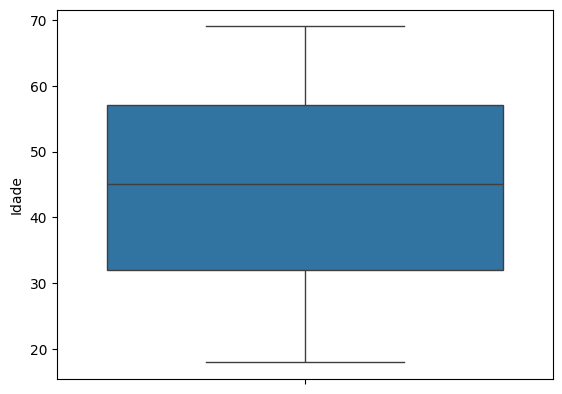

In [7]:
sns.boxplot(df['Idade'])

<Axes: ylabel='Valor_Financiado'>

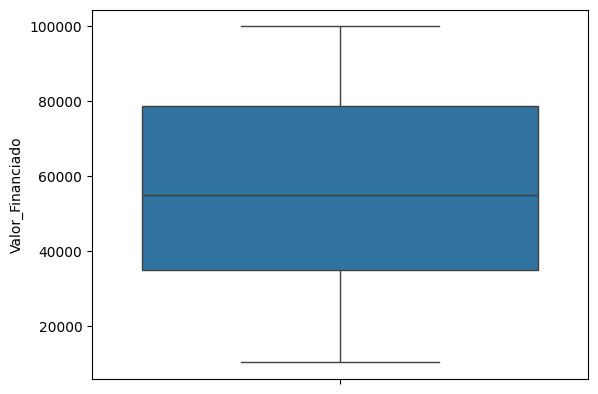

In [8]:
sns.boxplot(df['Valor_Financiado'])


<Axes: ylabel='Prazo_Financiamento (Meses)'>

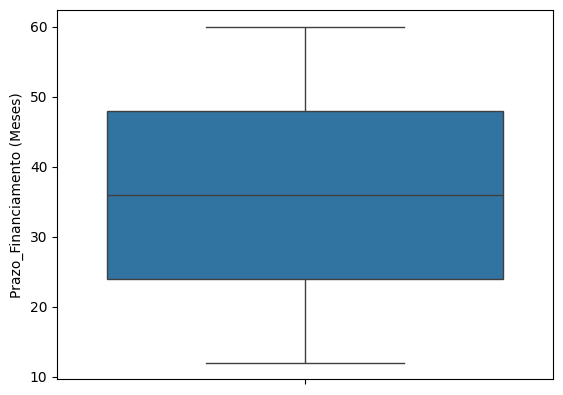

In [9]:
sns.boxplot(df['Prazo_Financiamento (Meses)'])

### Análise outliers 'Valor_parcela

<Axes: ylabel='Valor_Parcela'>

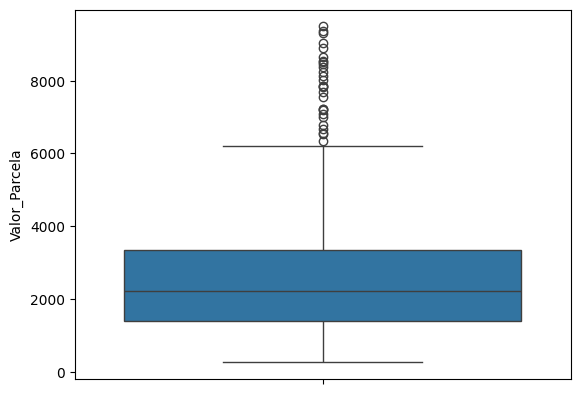

In [10]:
sns.boxplot(df['Valor_Parcela'])

In [11]:
dados = df['Valor_Parcela'].dropna()  
q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)
iqr = q3 - q1

q3_plus_1_5_iqr = q3 + 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Topo do box (Q3): {q3}")
print(f"Limite do bigode (Q3 + 1.5 × IQR): {q3_plus_1_5_iqr}")

Q1: 1407.241983542403
Q3: 3338.4774740549537
IQR: 1931.2354905125508
Topo do box (Q3): 3338.4774740549537
Limite do bigode (Q3 + 1.5 × IQR): 6235.33070982378


In [12]:
df_valor_parcela_maior_6000 = df.query('Valor_Parcela > 6235.33070982378')
df_valor_parcela_maior_6000.groupby(['Status_Pagamento'])['Valor_Parcela'].mean().reset_index(name='Valor_Parcela_Média').sort_values(by='Valor_Parcela_Média')

,Status_Pagamento,Valor_Parcela_Média
0,Atrasado,7487.554493
2,Inadimplente,7879.522635
1,Em dia,7921.985614


In [13]:
df_valor_parcela_maior_6000.shape[0]

28

In [14]:

df_valor_parcela_menor_6000 = df.query('Valor_Parcela < 6235.33070982378')
df_valor_parcela_menor_6000.groupby(['Status_Pagamento'])['Valor_Parcela'].mean().reset_index(name='Valor_Parcela_Média').sort_values(by='Valor_Parcela_Média')



,Status_Pagamento,Valor_Parcela_Média
1,Em dia,2265.673880
0,Atrasado,2328.312765
2,Inadimplente,2794.805392


In [15]:
df.groupby(['Status_Pagamento'])['Valor_Parcela'].mean().reset_index(name='Valor_Parcela_Média').sort_values(by='Valor_Parcela_Média')


,Status_Pagamento,Valor_Parcela_Média
0,Atrasado,2480.055169
1,Em dia,2615.221234
2,Inadimplente,3157.999481


No fim encontrei 28 outliers, porém resolvi mantelos. Visto que, por mais que sejam outliers estátisticos, eles parecem ser reais e validos para a análise. Nas demais counas, não encontrei nenhum outlier.

# Análise

### Análise dos clientes

#### Verificando destribuição de gêneros


In [16]:
df['Genero'].value_counts()


Genero
Masculino    262
Feminino     238
Name: count, dtype: int64

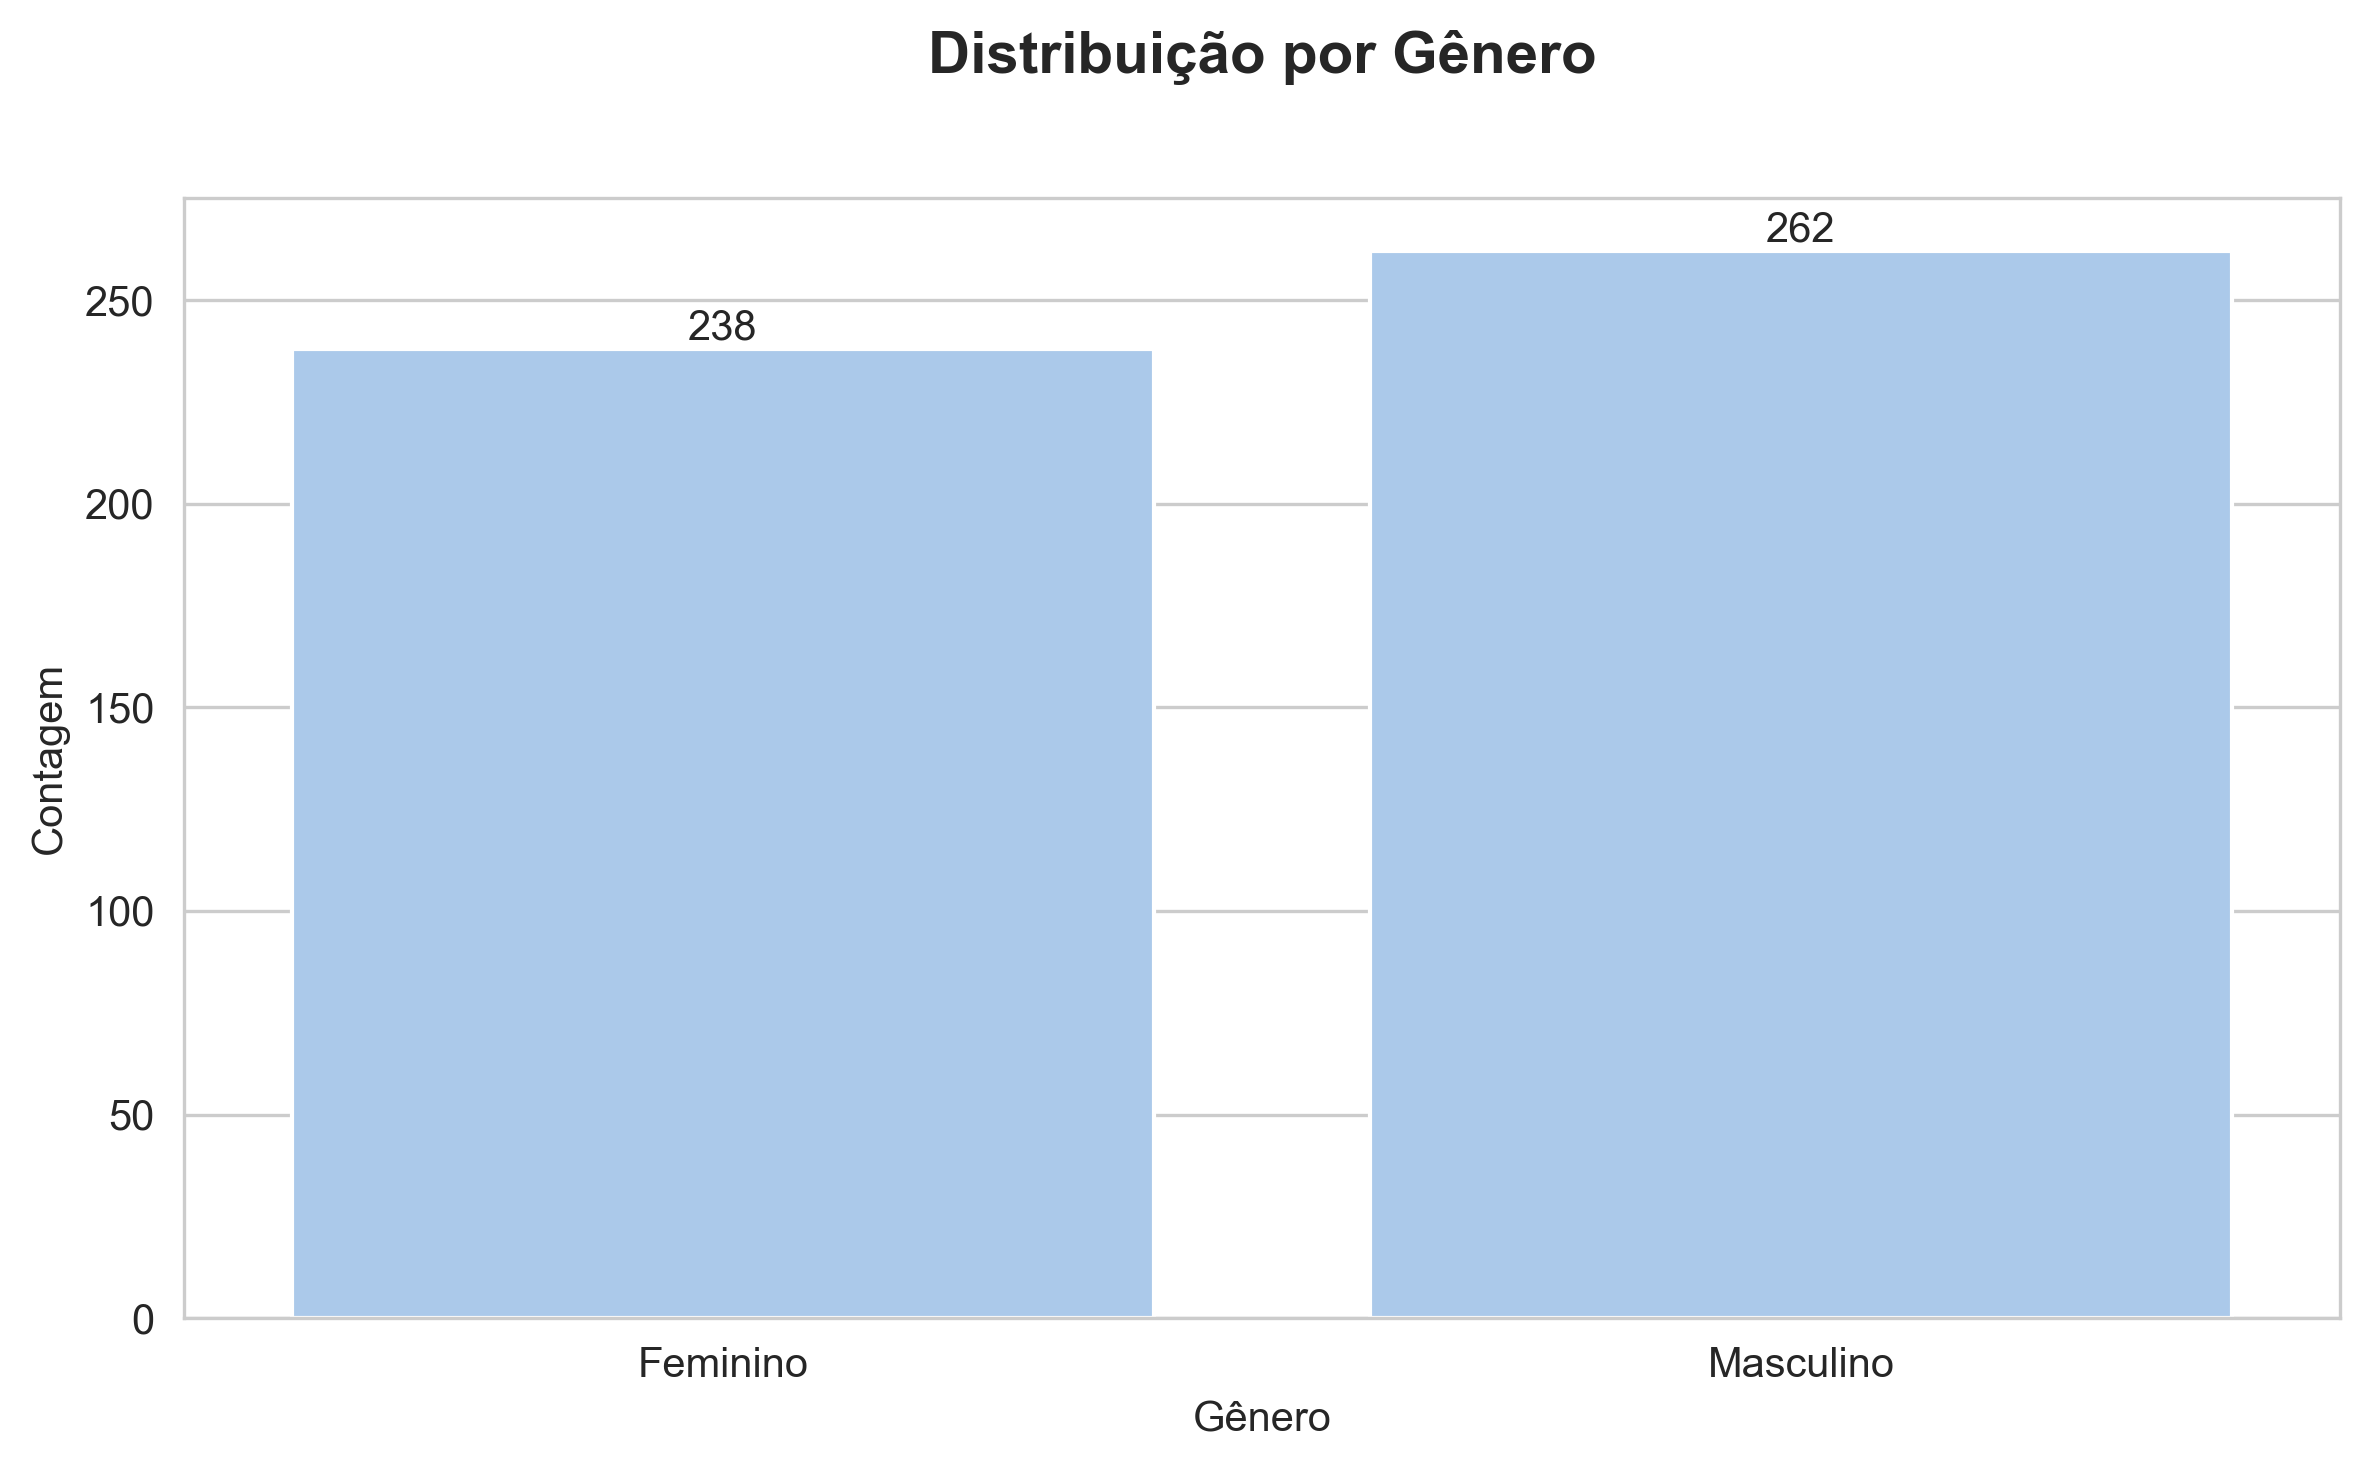

In [17]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 5), dpi=300)

ax = sns.countplot(data=df, x='Genero')

ax.set_title("Distribuição por Gênero", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Gênero")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


#### *Conclusão*: Sem distinção

#### Distribuição por Faixa Etária


In [18]:
def agrupar_idades (idade):
    if idade >=18 and idade <= 24:
        return '18-24'
    if idade >= 25 and idade <= 34:
        return '25-34'
    if idade >= 35 and idade <= 44:
        return '35-44'
    if idade >= 45 and idade <= 54:
        return '45-54'
    if idade >= 55 and idade <= 64:
        return '55-64'
    else: 
        return '65+'
    
df['Faixa_Idade'] = df['Idade'].apply(agrupar_idades)

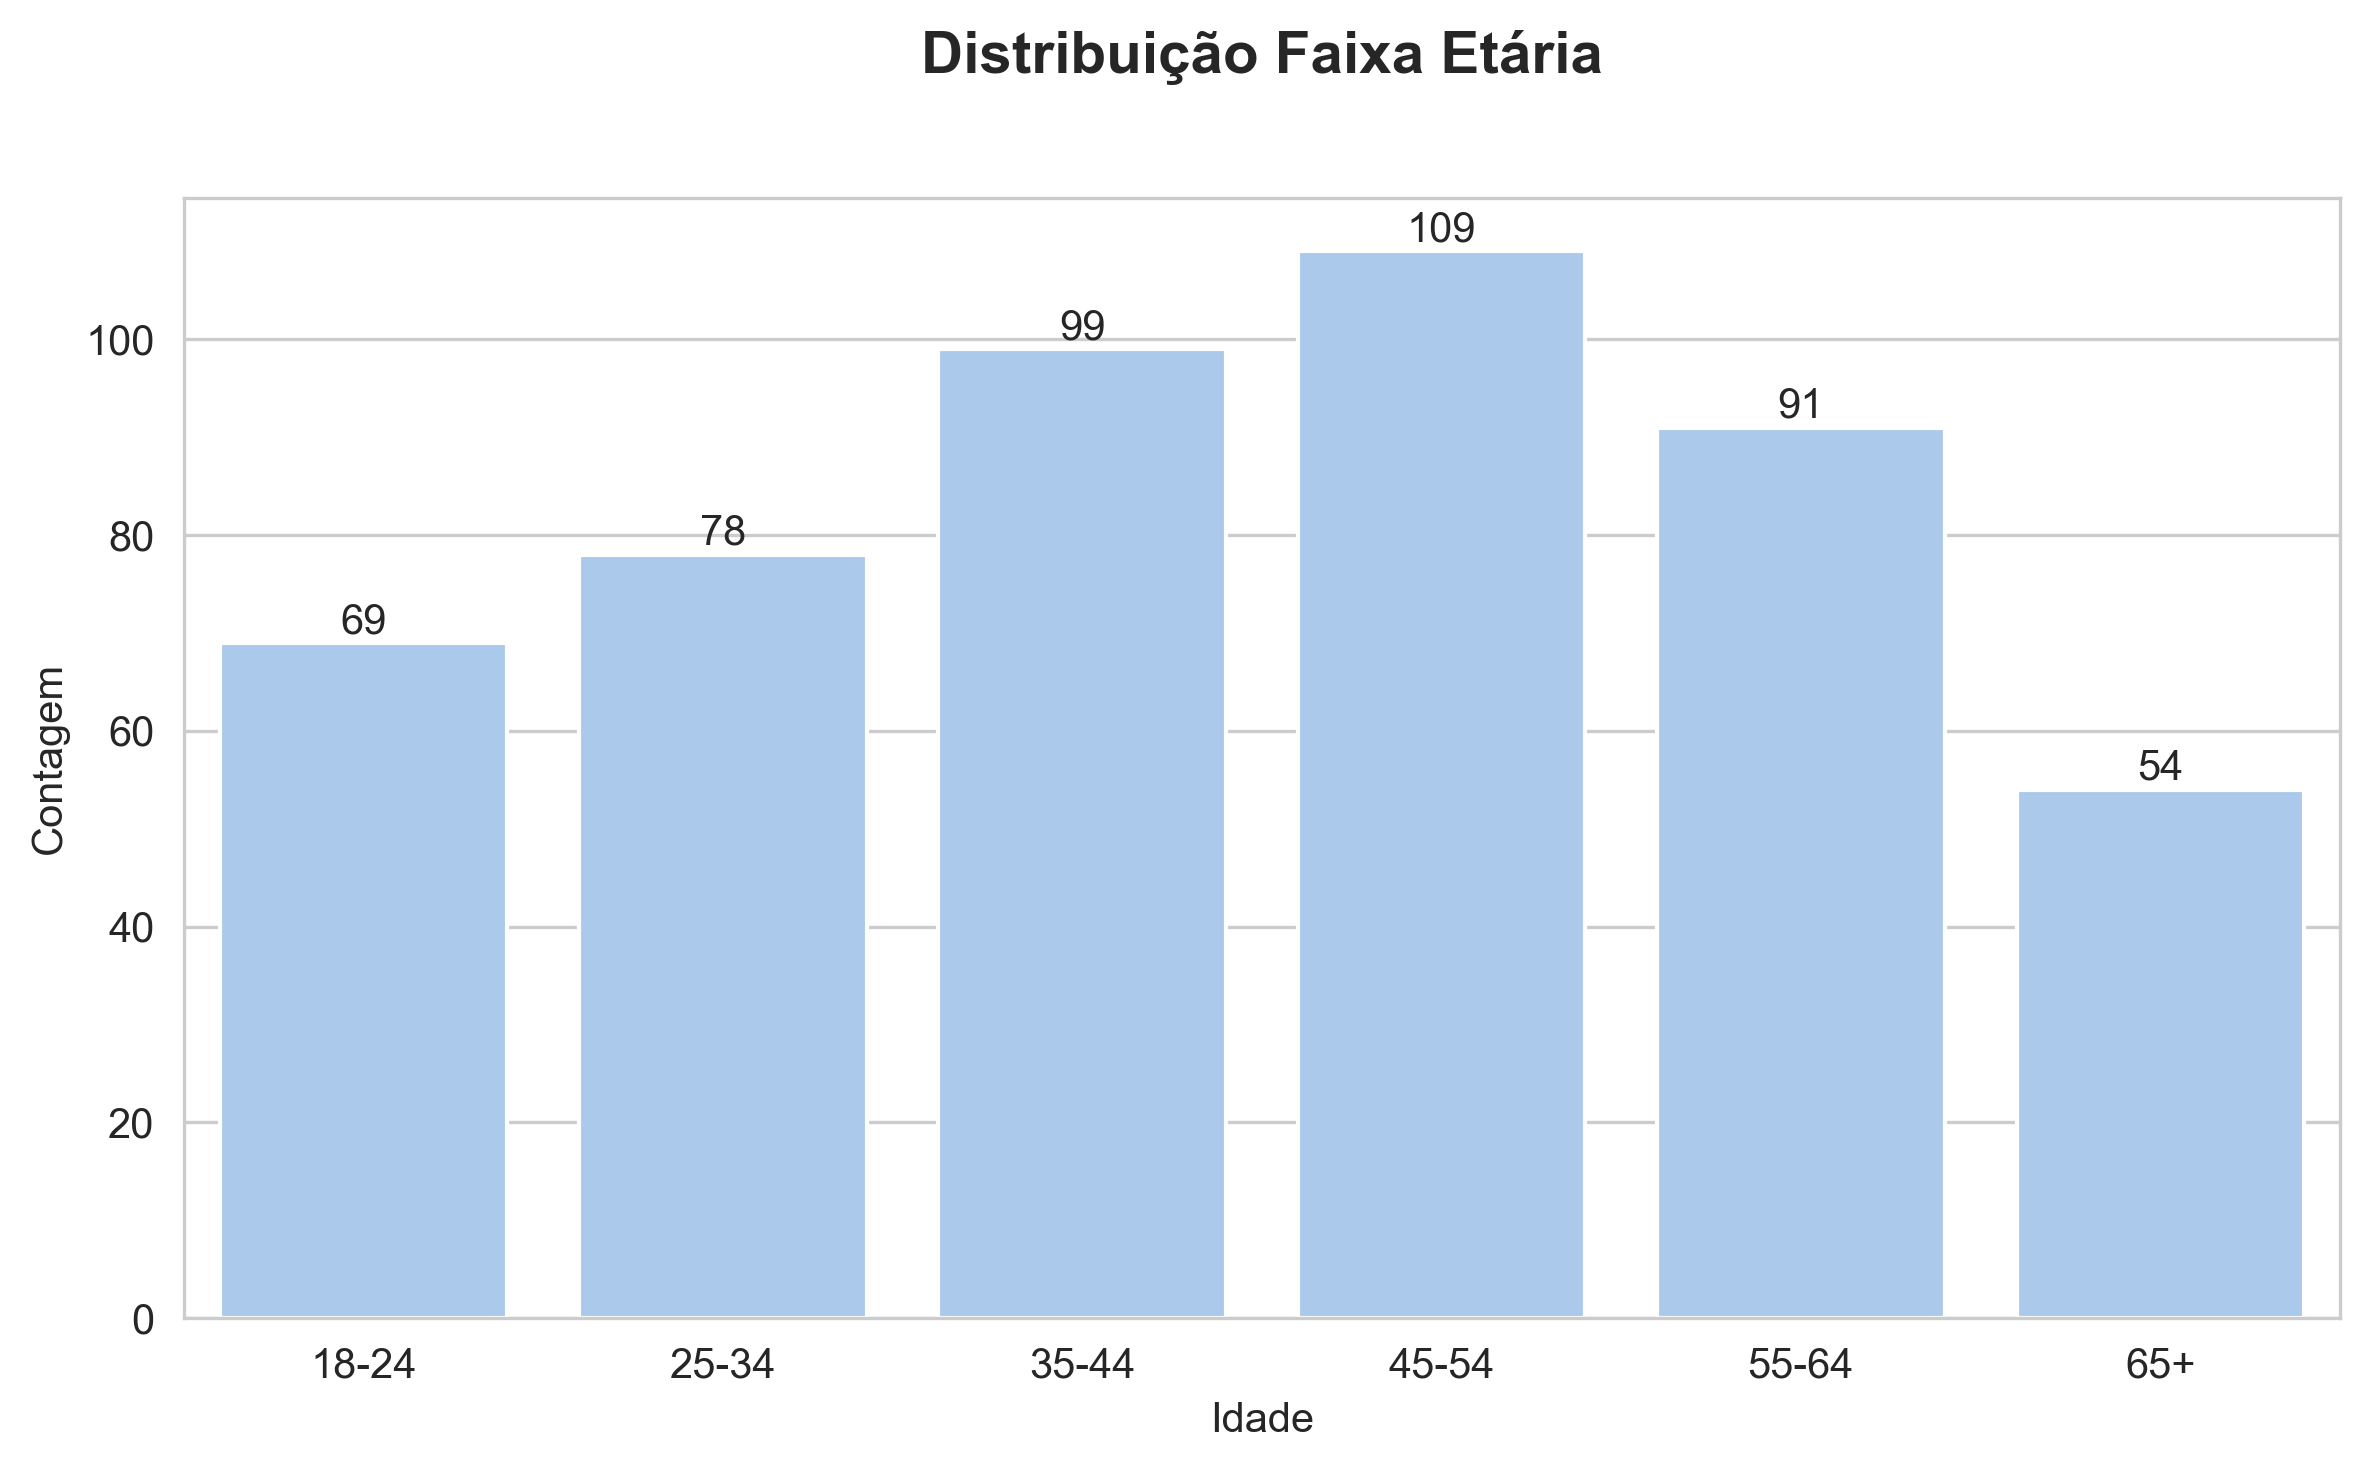

In [19]:
tabela_faixa_idade = df['Faixa_Idade'].value_counts().reset_index().sort_values('Faixa_Idade')
plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_faixa_idade['Faixa_Idade'], y=tabela_faixa_idade['count'])
ax.set_title("Distribuição Faixa Etária", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Idade")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

#### *Conclusão*: Maior volume de financiamento entre pessoas de 35-64 anos. Sendo que, temos um pico maior em 45-54 anos e entre 35-44

#### Distribuição por Faixa de Renda

In [20]:
tabela_faixa_renda = df['Faixa_de_Renda'].value_counts().reset_index(name='quantidade')
tabela_faixa_renda

,Faixa_de_Renda,quantidade
0,Baixa Renda,172
1,Media Renda,164
2,Alta Renda,164


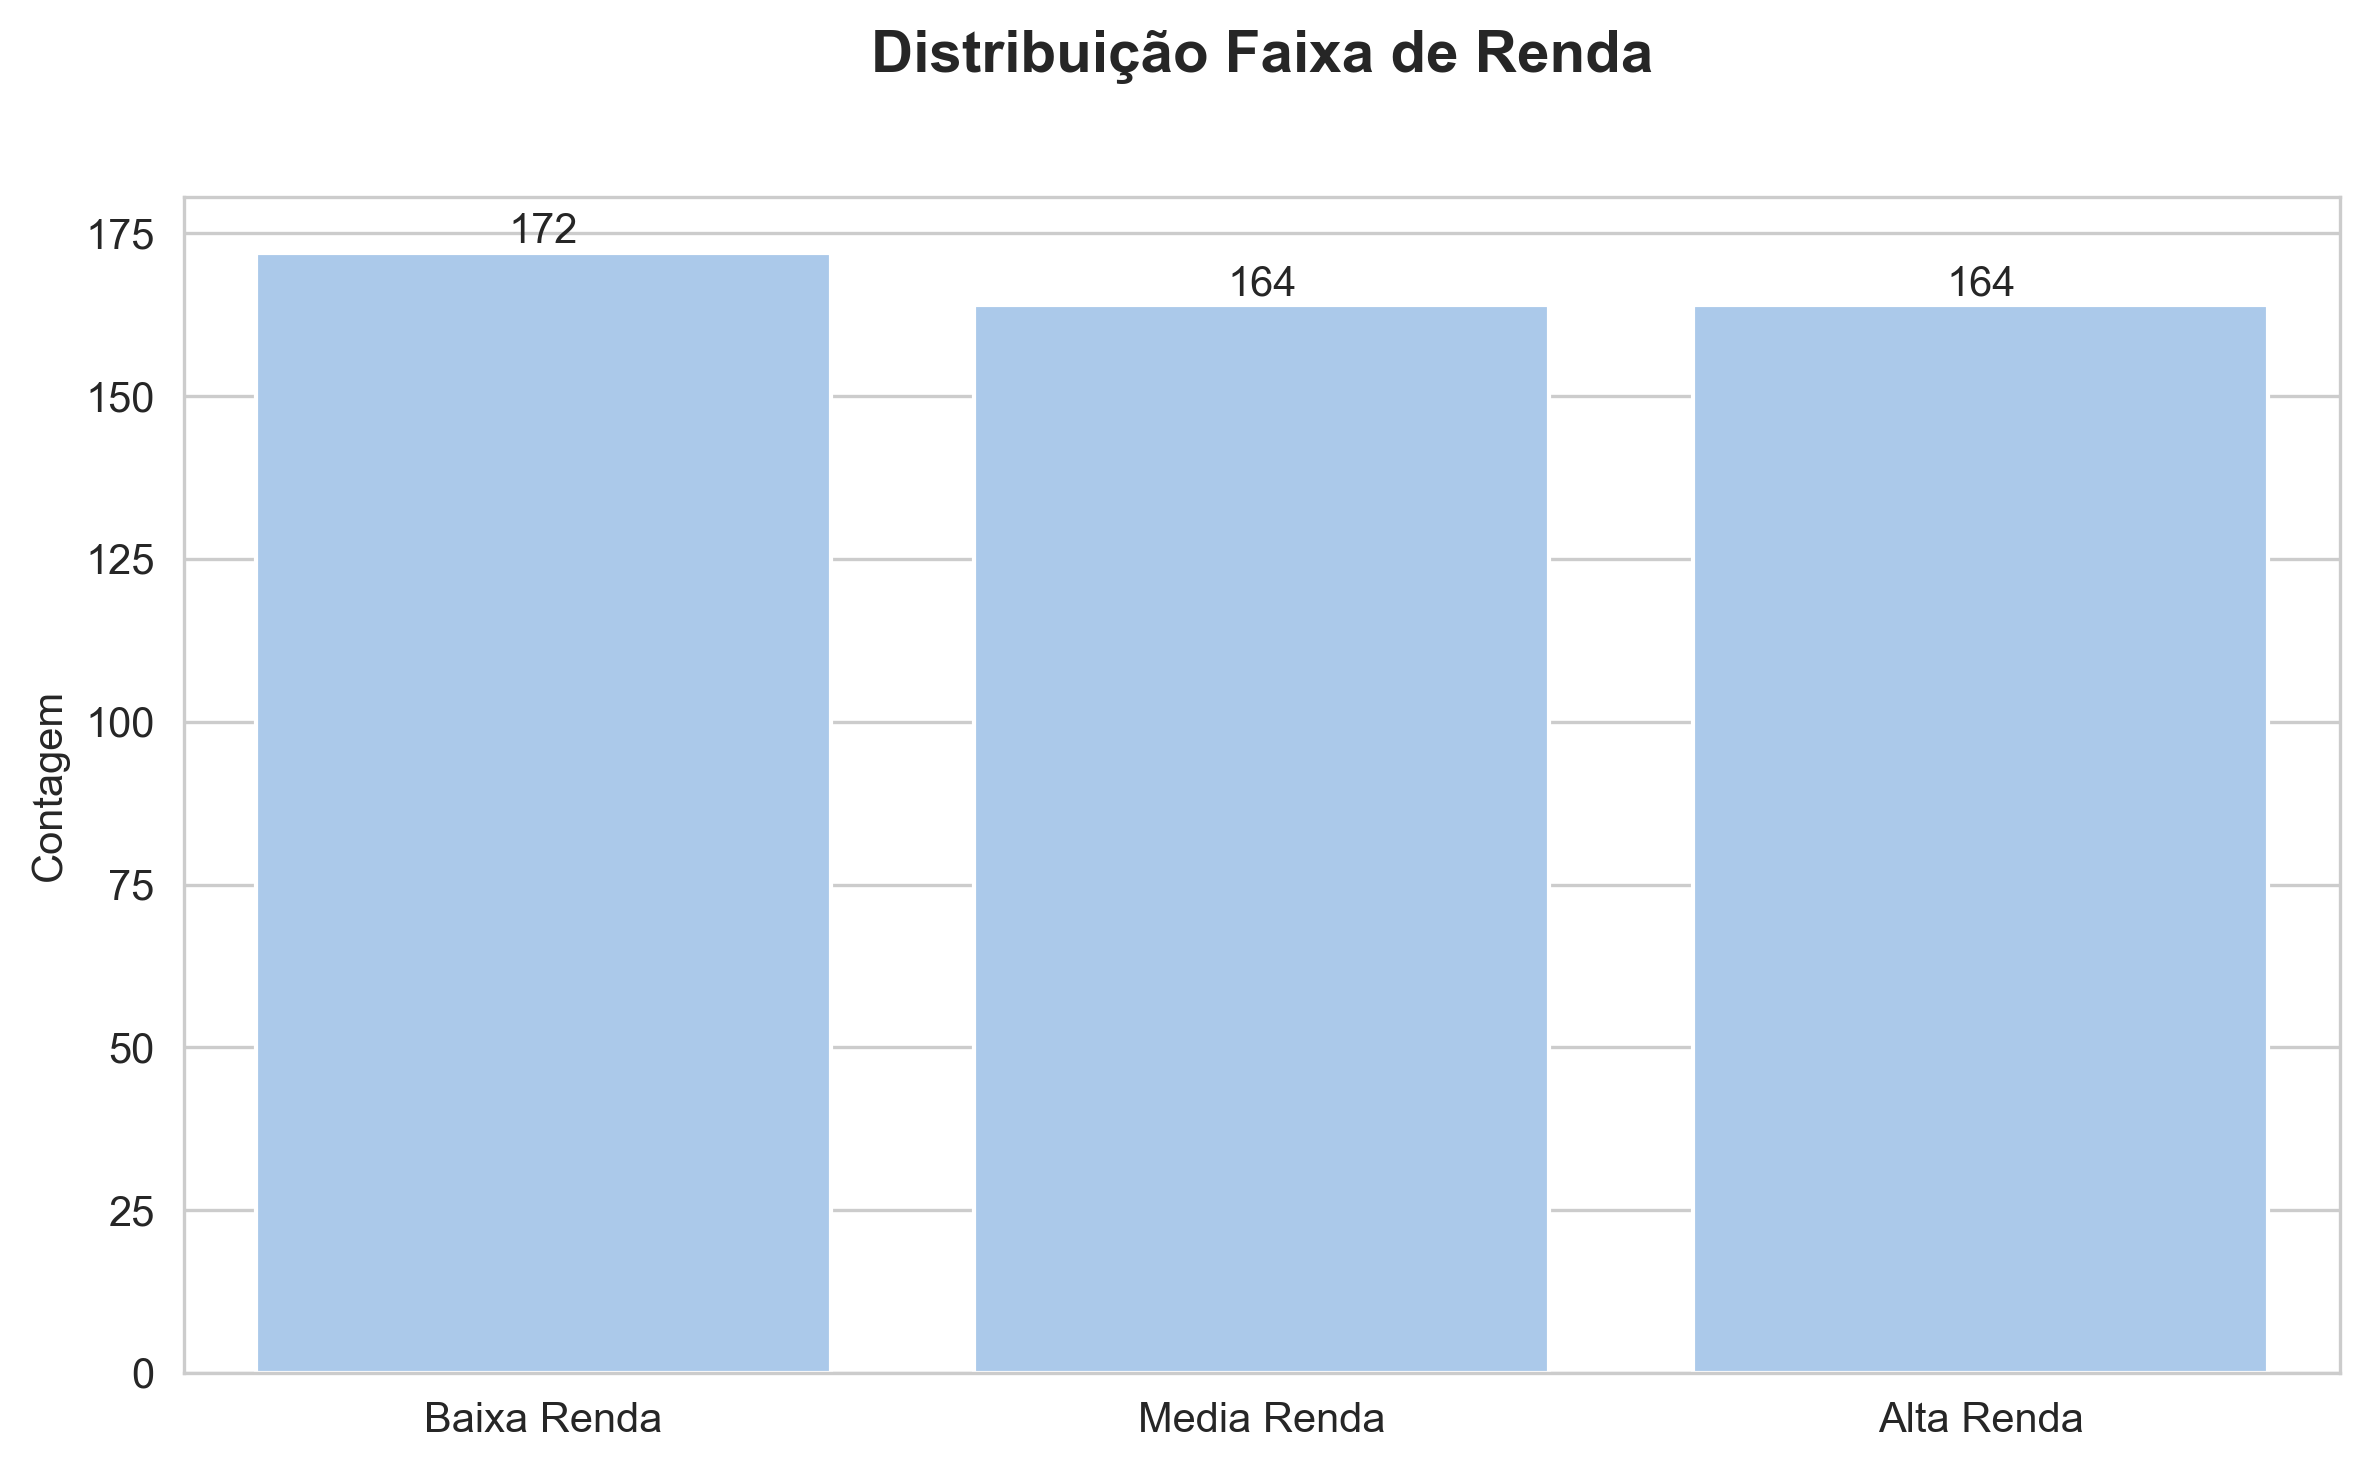

In [69]:

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_faixa_renda['Faixa_de_Renda'], y=tabela_faixa_renda['quantidade'])
ax.set_title("Distribuição Faixa de Renda", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

#### *conclusão*: A baixa renda predomina um pouco mais. A alta renda e média renda estão iguais

### Características dos clientes que tomam empréstimos maiores

Os parâmetros que eu vou avaliar são:
Faixa_Idade; 
Genero; 
Regiao; 
Faixa_de_Renda; 

parametro = Valor_Financiado

##### Faixa_Idade

In [22]:
tabela_faixa_idade = df.groupby('Faixa_Idade')['Valor_Financiado'].agg(['mean','median','std','min','max', 'count']).reset_index()

tabela_faixa_idade


,Faixa_Idade,mean,median,std,min,max,count
0,18-24,46940.217391,45488.0,24648.854978,10281,92970,69
1,25-34,58170.923077,58369.0,24723.519343,10526,98576,78
2,35-44,55044.070707,55004.0,27204.934840,10661,98009,99
3,45-54,56383.146789,55241.0,26024.577890,10619,99899,109
4,55-64,57589.868132,60138.0,25928.819824,11058,99186,91
5,65+,54190.037037,54467.5,25805.942481,11239,97128,54


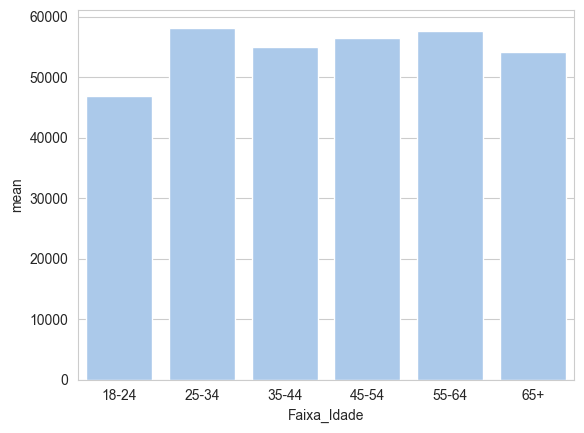

In [23]:
sns.barplot(x = tabela_faixa_idade['Faixa_Idade'], y = tabela_faixa_idade['mean'])
plt.show()

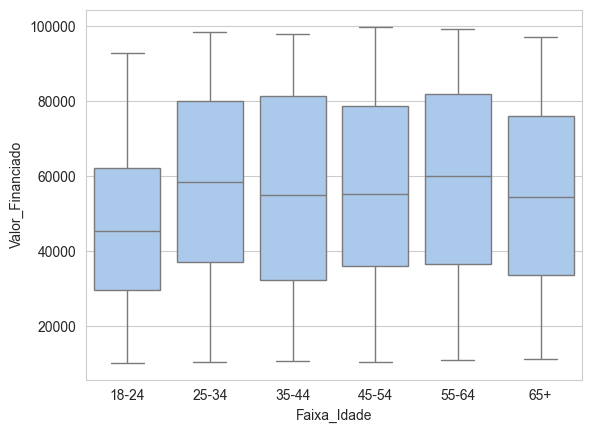

In [24]:
sns.boxplot(x='Faixa_Idade', y='Valor_Financiado', data=df.sort_values('Faixa_Idade'))
plt.show()

In [25]:
df_valor_financiado_maior_8mil = df.query('Valor_Financiado > 80000')
tabela_faixa_idade = df_valor_financiado_maior_8mil.groupby('Faixa_Idade')['Valor_Financiado'].agg(['count']).reset_index()
tabela_faixa_idade

,Faixa_Idade,count
0,18-24,8
1,25-34,20
2,35-44,27
3,45-54,26
4,55-64,24
5,65+,12


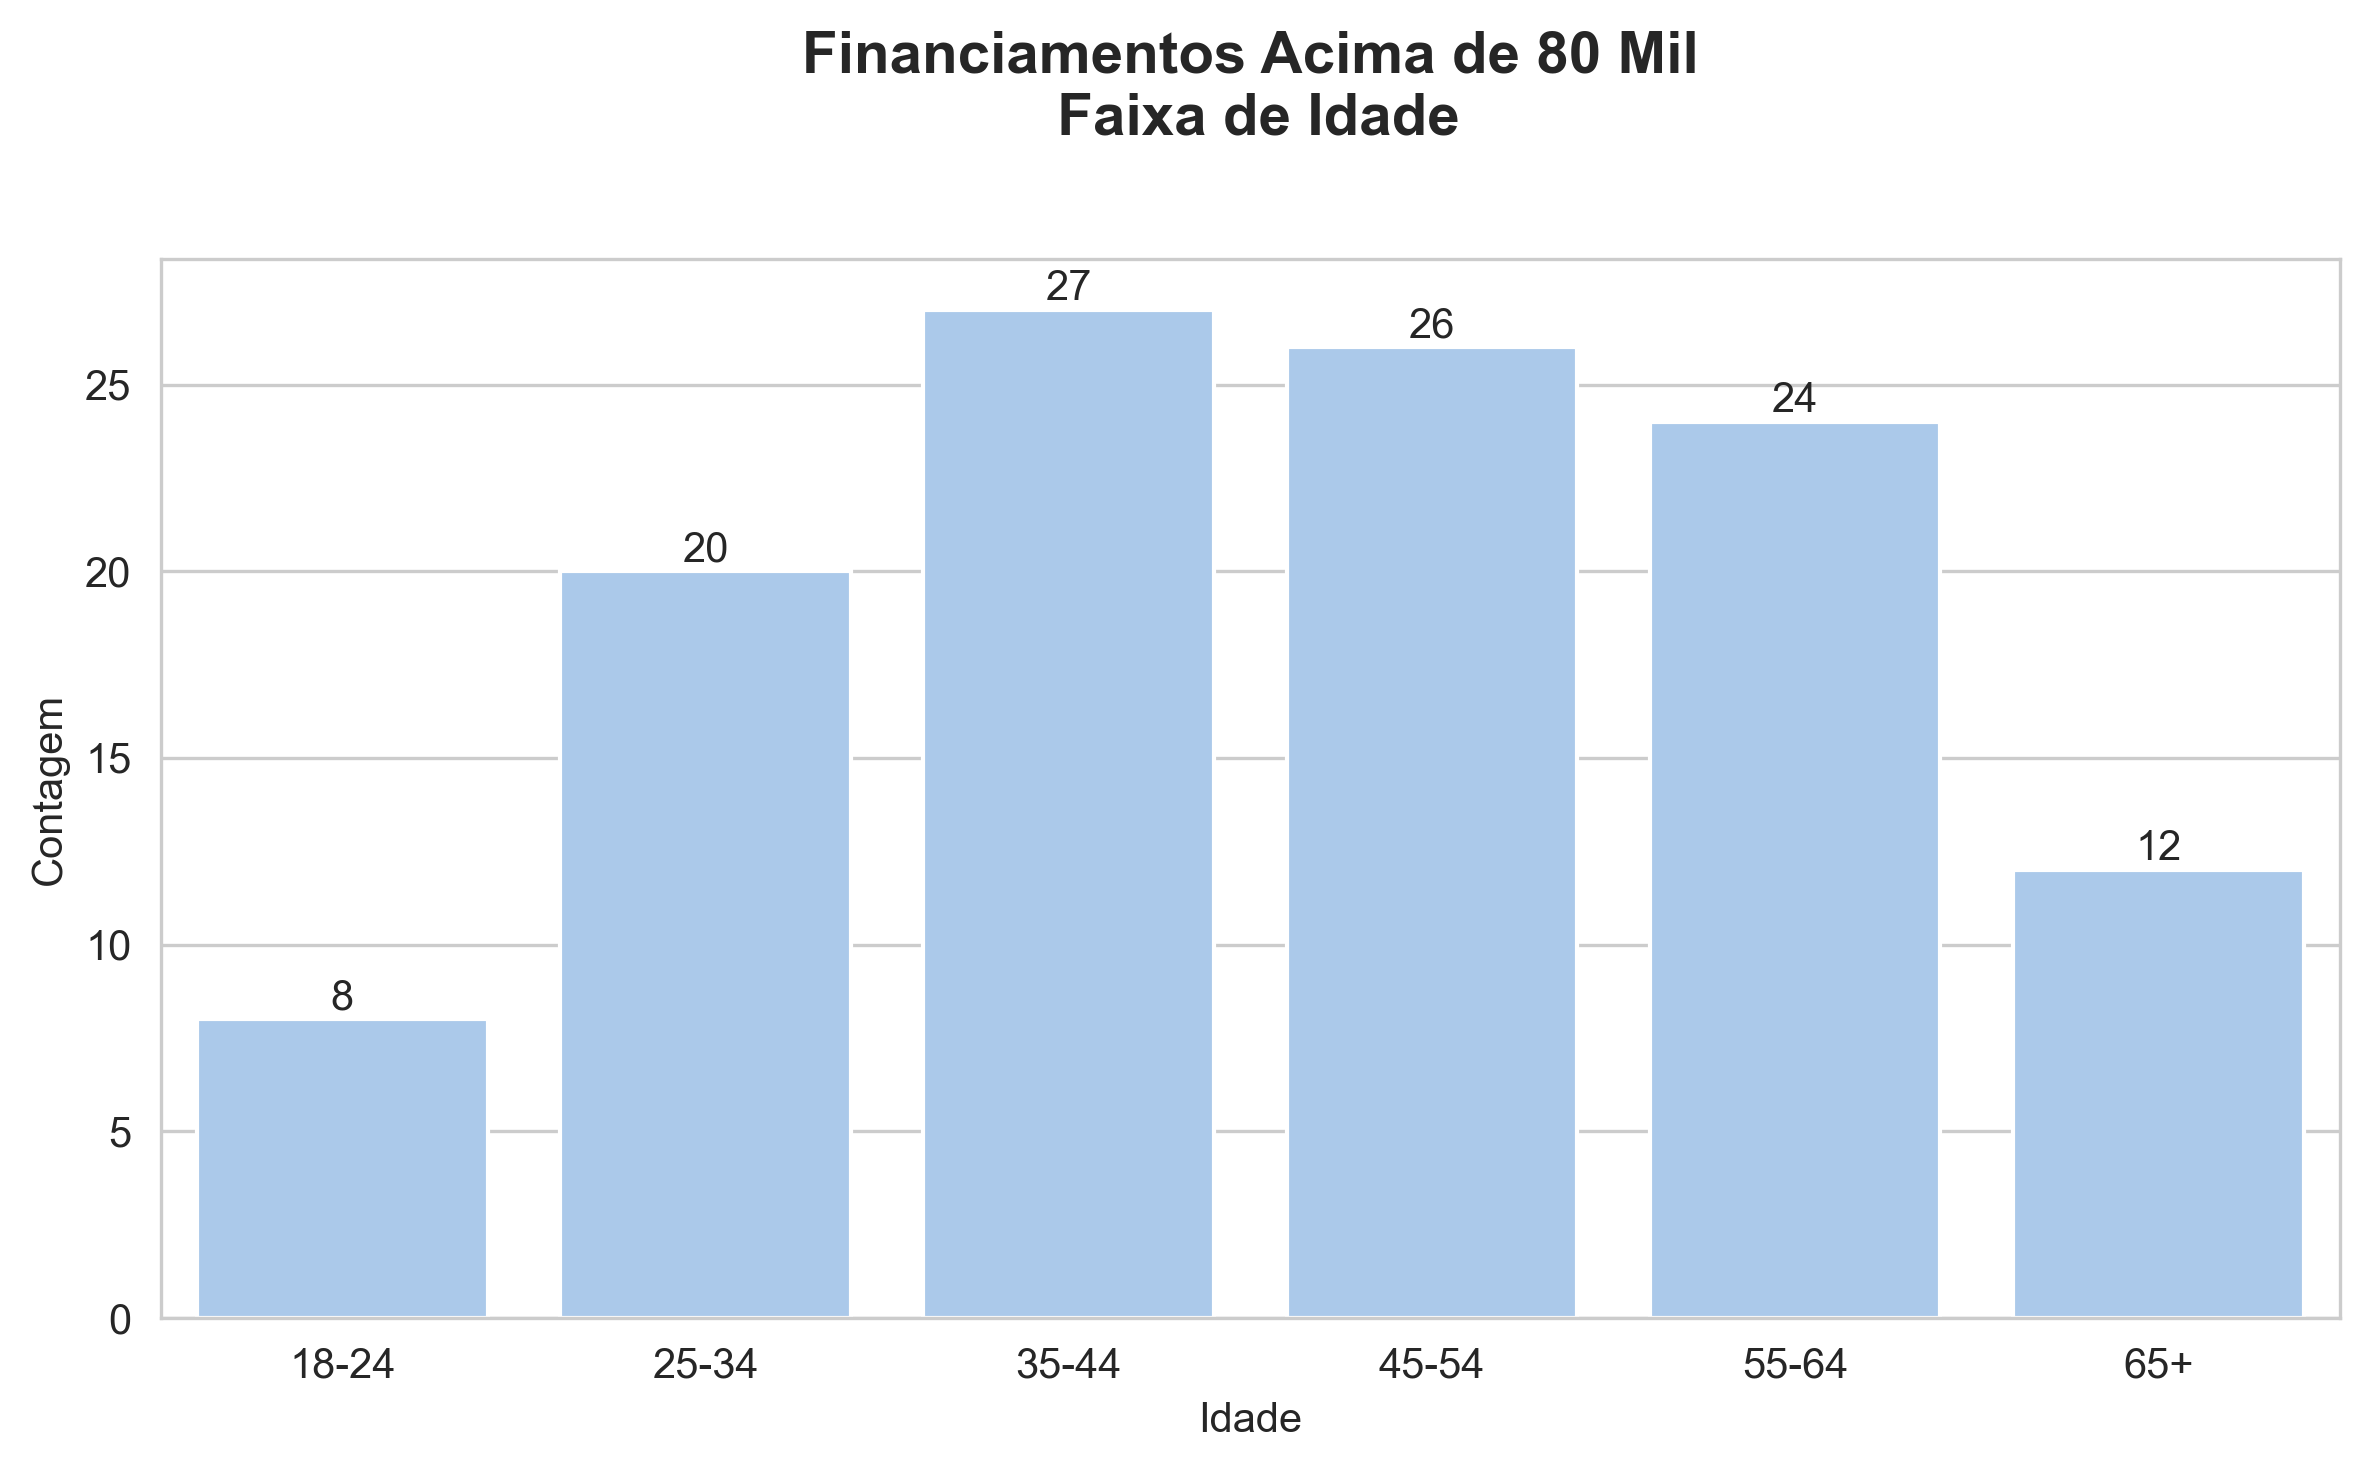

In [26]:

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_faixa_idade['Faixa_Idade'], y=tabela_faixa_idade['count'])
ax.set_title("Financiamentos Acima de 80 Mil\n Faixa de Idade", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Idade")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

##### *conclusão*: entre 18 e 24 anos os financiamenos tendem a ser mais baixos quando comparado a outras faixas de idade. As demais demonstram pouca variancia entre si. Porém, quando olhamos para os financiamentos acima de 80mil, entre 18-24 anos e 65+, temos poucas recorencias, entre 35-64 temos mais recorrencias e entre 25-34 fica na média.

##### Genero

In [27]:
tabela_genero = df.groupby('Genero')['Valor_Financiado'].agg(['mean','median','std','min','max']).reset_index()

tabela_genero

,Genero,mean,median,std,min,max
0,Feminino,53985.533613,53496.5,26532.269374,10281,99393
1,Masculino,56067.618321,55756.5,25415.987273,10526,99899


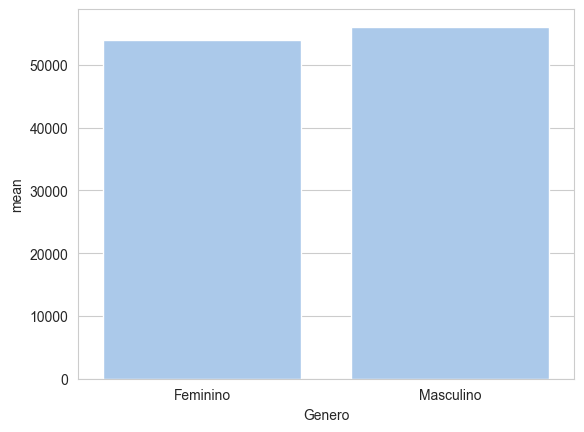

In [28]:
sns.barplot(x = tabela_genero['Genero'], y = tabela_genero['mean'])
plt.show()

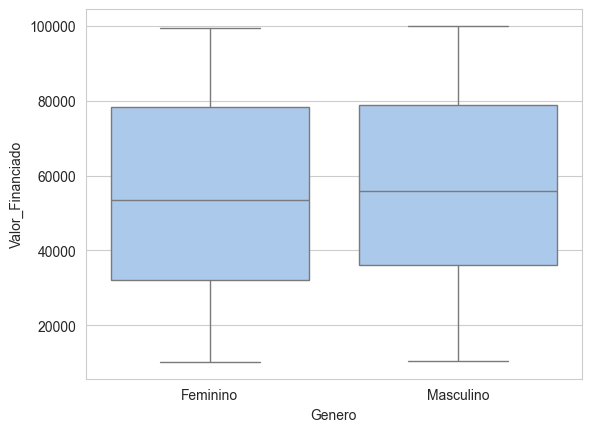

In [29]:
sns.boxplot(x='Genero', y='Valor_Financiado', data=df)
plt.show()

In [30]:
tabela_genero = df_valor_financiado_maior_8mil.groupby('Genero')['Valor_Financiado'].agg(['count']).reset_index()

tabela_genero

,Genero,count
0,Feminino,56
1,Masculino,61


##### *conclusão*: Mulheres fazem empréstimo levemente mais baixo.

##### Regiao

In [31]:
tabela_regiao = df.groupby('Regiao')['Valor_Financiado'].agg(['mean','median','std','min','max', 'count']).reset_index()

tabela_regiao

,Regiao,mean,median,std,min,max,count
0,Regiao A,55620.203125,55519.5,26968.365505,10526,99393,128
1,Regiao B,54356.835938,53736.0,25472.561609,11435,99152,128
2,Regiao C,55535.169231,56491.0,26045.495079,10619,99899,130
3,Regiao D,54751.228070,49472.0,25513.309406,10281,98009,114


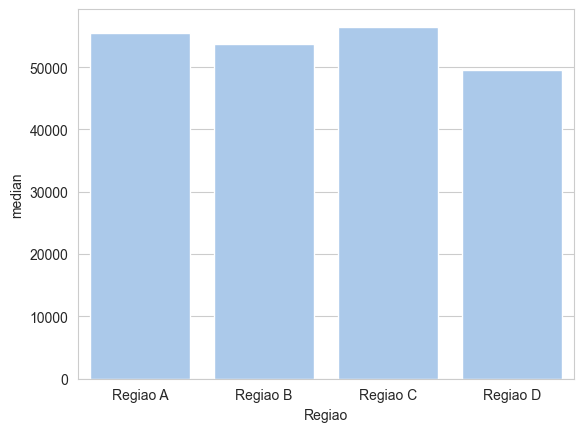

In [32]:
sns.barplot(x = tabela_regiao['Regiao'], y = tabela_regiao['median'])
plt.show()

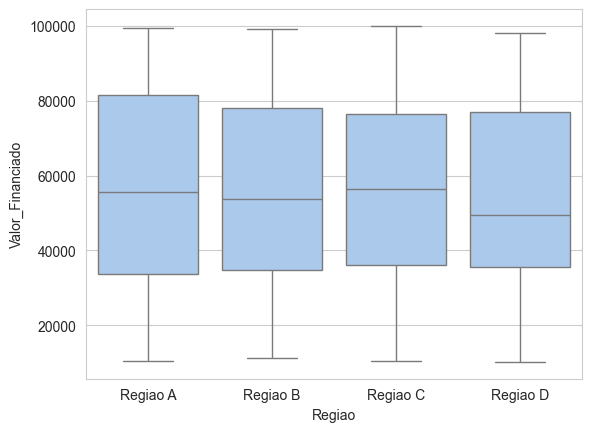

In [33]:
sns.boxplot(x='Regiao', y='Valor_Financiado', data=df.sort_values('Regiao'))
plt.show()

In [34]:
df_valor_financiado_maior_8mil = df.query('Valor_Financiado > 80000')
tabela_regiao = df_valor_financiado_maior_8mil.groupby('Regiao')['Valor_Financiado'].agg(['count']).reset_index()
tabela_regiao

,Regiao,count
0,Regiao A,35
1,Regiao B,29
2,Regiao C,29
3,Regiao D,24


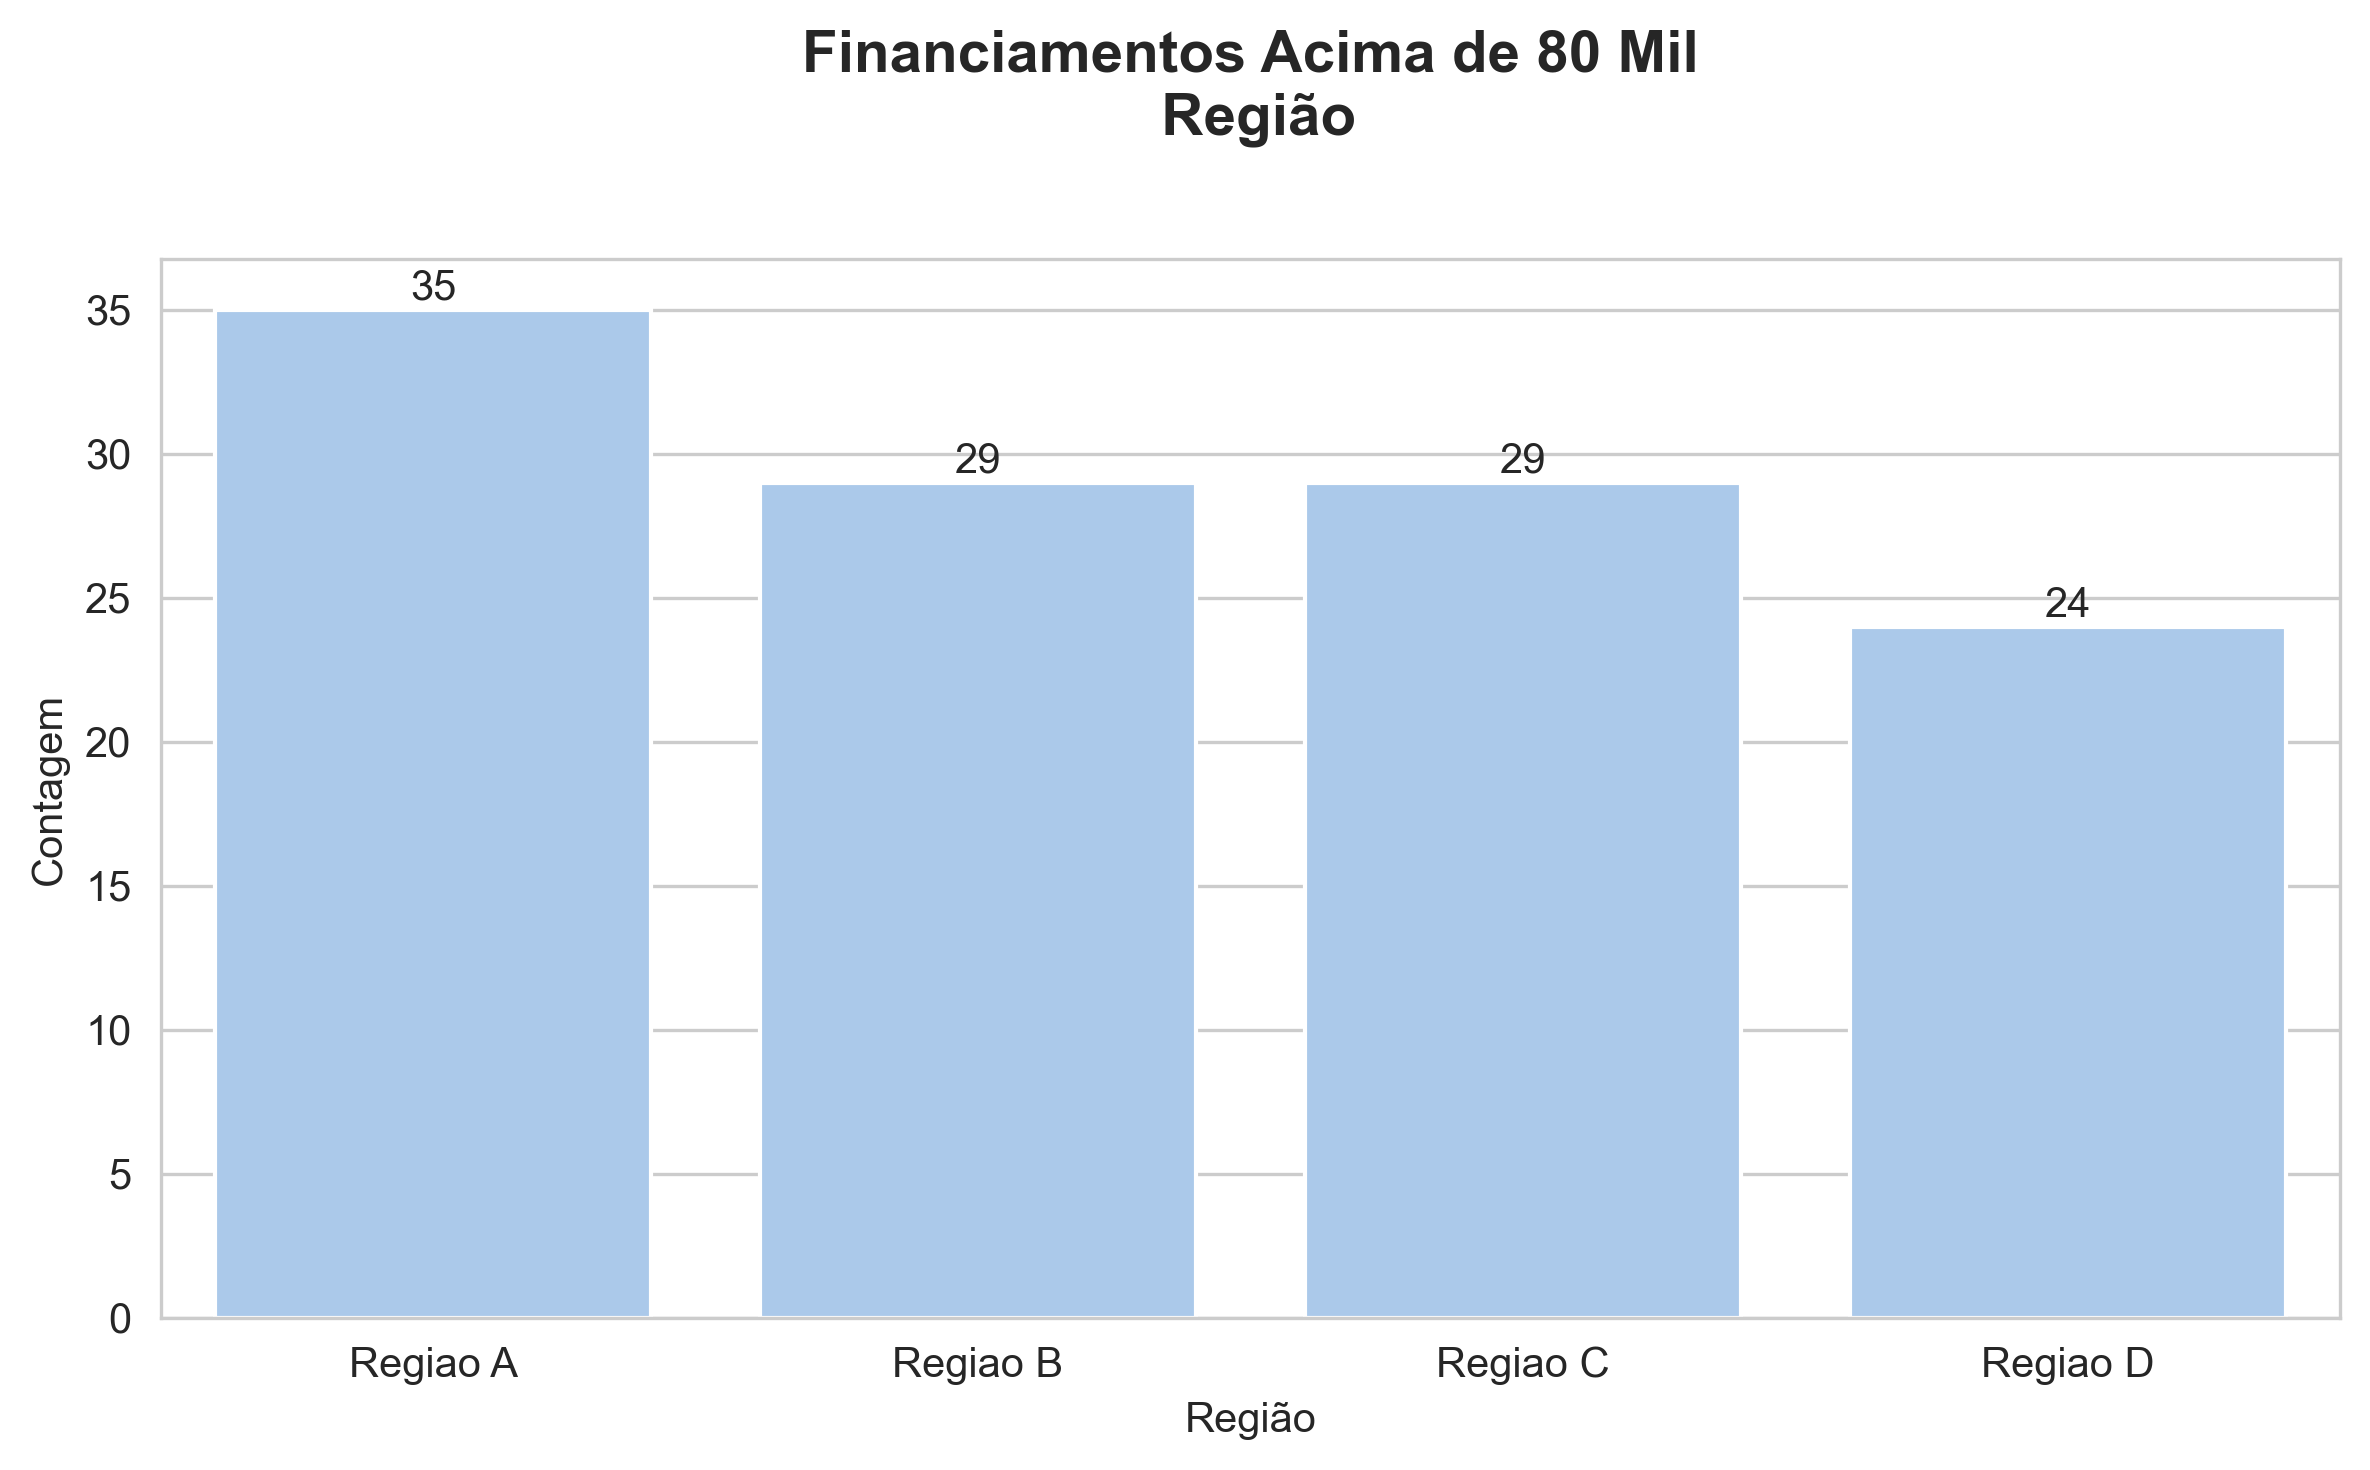

In [35]:
plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_regiao['Regiao'], y=tabela_regiao['count'])
ax.set_title("Financiamentos Acima de 80 Mil\n Região", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Região")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

##### *conclusão*: A região A tem mais chances de fazer um empréstimo mais alto. Enquanto a região D tem mentos chances. Já as regiões B e C ficam na média.

##### Faixa_de_Renda

In [36]:

tabela_Faixa_de_Renda = df.groupby('Faixa_de_Renda')['Valor_Financiado'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()


tabela_Faixa_de_Renda['Faixa_de_Renda'] = pd.Categorical(
    tabela_Faixa_de_Renda['Faixa_de_Renda'], 
    categories=['Baixa Renda', 'Media Renda', 'Alta Renda'], 
    ordered=True
)

tabela_Faixa_de_Renda = tabela_Faixa_de_Renda.sort_values('Faixa_de_Renda')

tabela_Faixa_de_Renda

,Faixa_de_Renda,mean,median,std,min,max,count
1,Baixa Renda,56720.308140,56159.5,26156.925317,10281,99152,172
2,Media Renda,55453.012195,55405.5,24904.470813,10661,99899,164
0,Alta Renda,52976.134146,47473.5,26754.192233,10526,99186,164


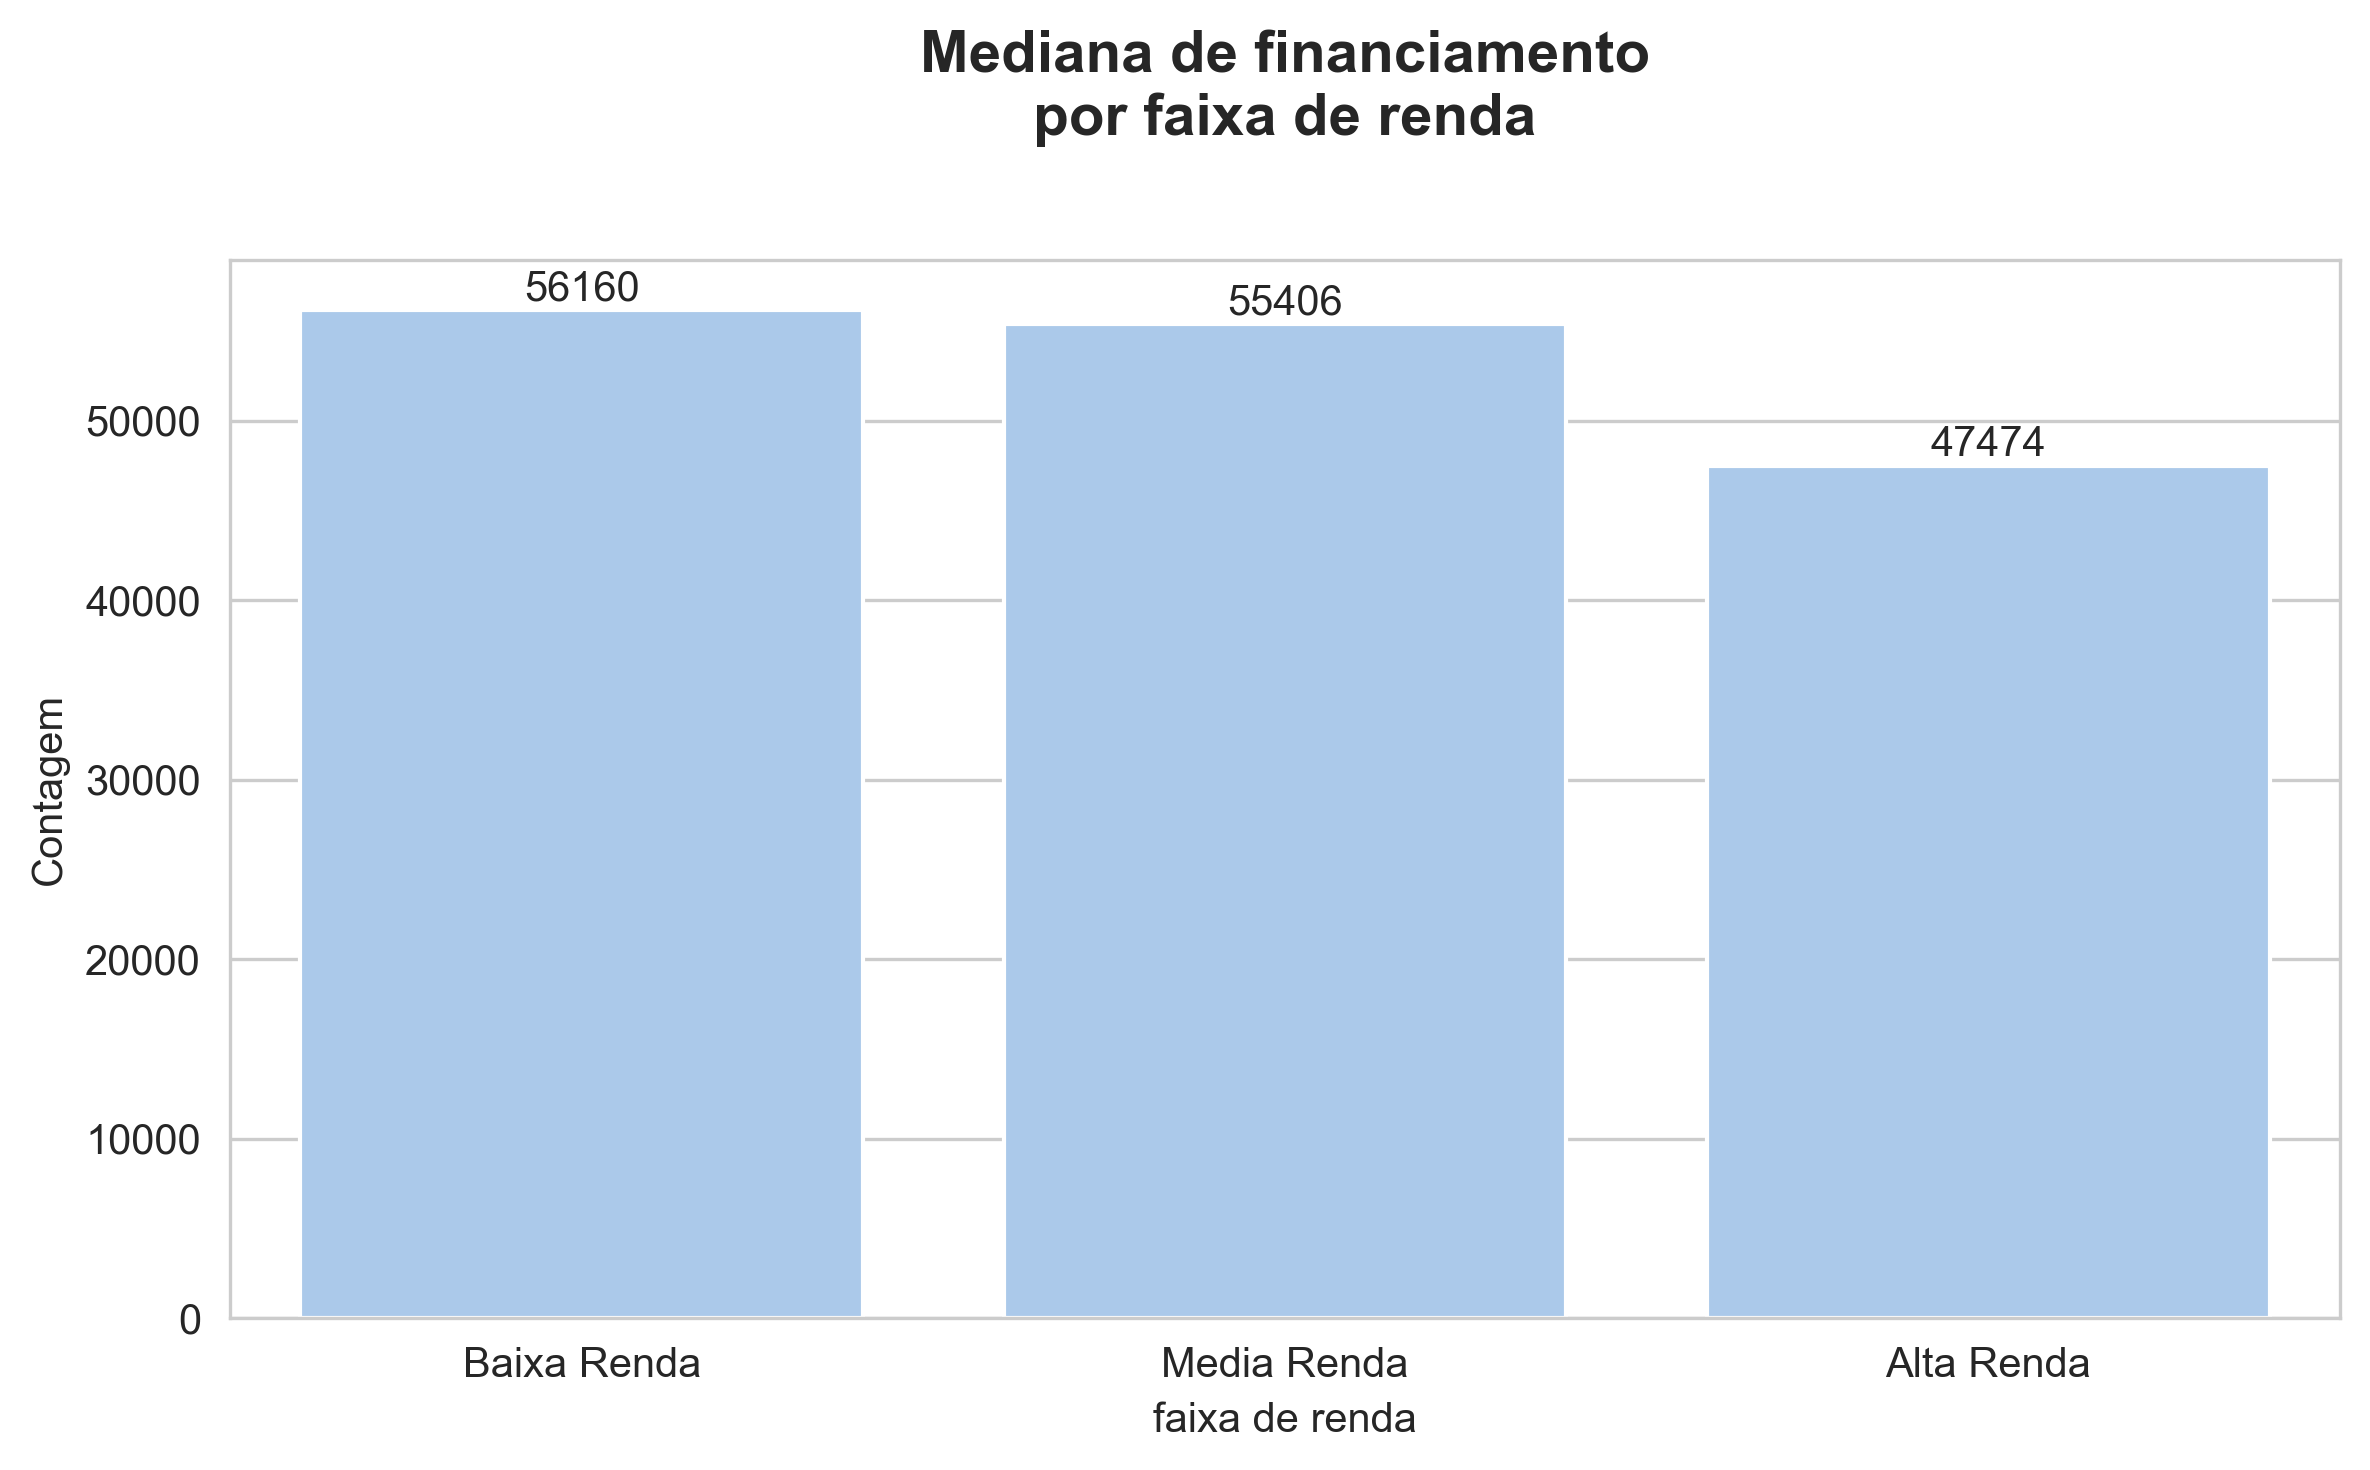

In [37]:
plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x = tabela_Faixa_de_Renda['Faixa_de_Renda'], y = tabela_Faixa_de_Renda['median'])
ax.set_title("Mediana de financiamento\npor faixa de renda", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("faixa de renda")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

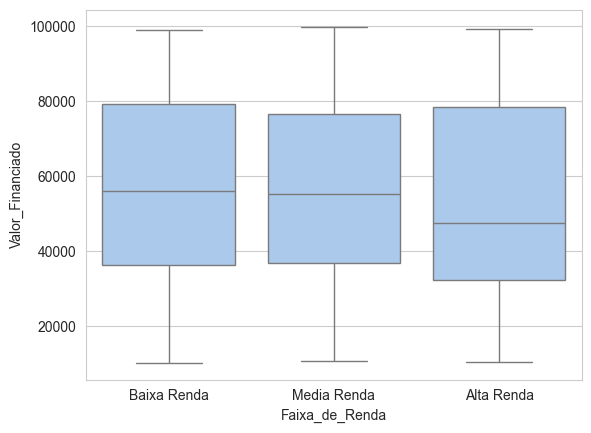

In [38]:
sns.boxplot(x='Faixa_de_Renda', y='Valor_Financiado', data=df.sort_values('Regiao'))
plt.show()

In [39]:
df_valor_financiado_maior_8mil = df.query('Valor_Financiado > 80000')
tabela_Faixa_de_Renda = df_valor_financiado_maior_8mil.groupby('Faixa_de_Renda')['Valor_Financiado'].agg(['mean','median','std','min','max', 'count']).reset_index().sort_values('mean')
tabela_Faixa_de_Renda

,Faixa_de_Renda,mean,median,std,min,max,count
0,Alta Renda,88368.050000,87229.0,5218.382940,80135,99186,40
2,Media Renda,89807.142857,88916.0,5750.565727,80316,99899,35
1,Baixa Renda,91205.476190,91623.0,4476.620411,81260,99152,42


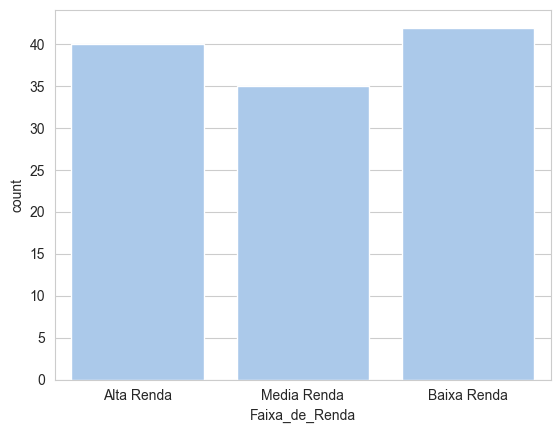

In [40]:
sns.barplot(x=tabela_Faixa_de_Renda['Faixa_de_Renda'], y=tabela_Faixa_de_Renda['count'])
plt.show()

##### *conclusão*: A Baixa Renda tende a fazer emprestimos mais altos. A alta renda faz emprestimos altos tanto quanto a baixa, mas em média faz empréstimos mais baixos. Enquanto a média renda faz menos empréstimos altos.

#### *Conclusão sobre as características dos clientes que tomam empréstimos maiores*

Faixa Etária

Entre 18 e 24 anos, os financiamentos tendem a ter valores mais baixos quando comparados às demais faixas etárias.
As faixas entre 25 e 64 anos apresentam pouca variação entre si, mas, ao observar financiamentos acima de 80 mil, percebe-se que:
18–24 e 65+ anos têm poucas recorrências de empréstimos mais altos.
35–64 anos são as faixas que mais tomam empréstimos acima de 80 mil.
25–34 anos ficam em um nível intermediário.

Gênero

As mulheres fazem empréstimos levemente mais baixos em comparação aos homens.

Região

A Região A se destaca com maior propensão a empréstimos de valor mais alto.
A Região D tem menor chance de empréstimos elevados, enquanto B e C ficam na média.

Faixa de Renda

Baixa Renda: tende a fazer empréstimos altos com maior frequência, apesar de também recorrer a valores menores.
Média Renda: recorre menos a empréstimos elevados, situando-se mais no meio-termo.
Alta Renda: faz empréstimos altos “tanto quanto” a baixa renda, porém, em média, opta por valores de financiamento mais baixos.

### análise de Financiamentos e Veículos

##### Quais são as regiões com maior volume de financiamentos?

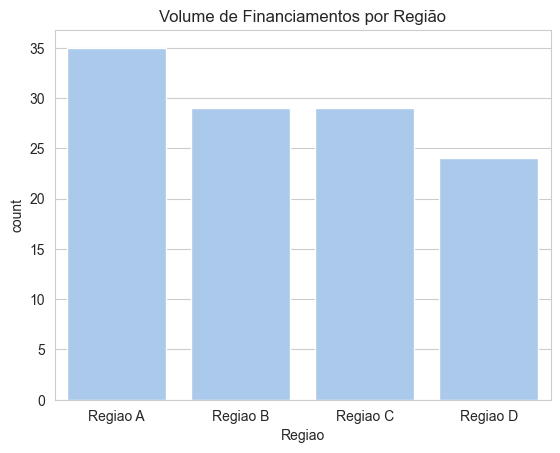

In [41]:
sns.barplot(x=tabela_regiao['Regiao'], y=tabela_regiao['count']) 
plt.title('Volume de Financiamentos por Região')
plt.show()

##### *conclusão*: Região D tem menos volum; C tem ligeiramente mais volume que A e B 

##### Há  diferenças  significativas  nas  taxas  de  inadimplência  entre  regiões  com diferentes rendas médias?

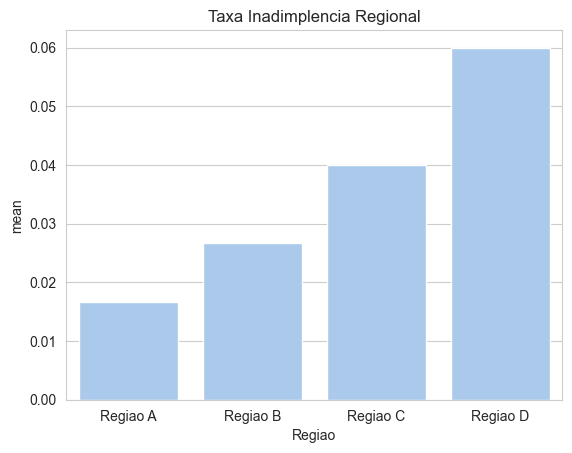

In [42]:
tabela_regiao = df.groupby('Regiao')['Taxa_Inadimplencia_Regional'].agg(['mean','median','std','min','max', 'count']).reset_index()
sns.barplot(x=tabela_regiao['Regiao'], y=tabela_regiao['mean'])
plt.title('Taxa Inadimplencia Regional')
plt.show()

##### *conclusão*: Quanto maior a renda média da região, menor a taxa de Inadimplência.

##### Qual o perfil dos veículos financiados (valor médio dos veículos, modelo e ano mais financiados)?

In [43]:
tabela_veiculo = df.groupby('Modelo_Ano_Veiculo')['Valor_Veiculo'].agg(['mean','median','std','min','max', 'count']).reset_index()
tabela_veiculo

,Modelo_Ano_Veiculo,mean,median,std,min,max,count
0,2010,100755.923333,100259.322034,44404.654831,35772.619048,189387.804878,41
1,2011,80534.513692,83510.112360,41443.343471,14632.911392,181920.000000,37
2,2012,88665.120945,80782.333333,52079.138120,12222.580645,211997.560976,44
3,2013,67536.319996,61643.434343,41606.911416,13013.924051,199940.000000,33
4,2014,93039.871045,96608.504194,48394.556348,11845.555556,202420.408163,44
5,2015,88003.918651,81854.899399,51452.938919,15344.871795,213936.585366,44
6,2016,89795.390216,68966.382353,58464.770960,16471.000000,207673.913043,34
7,2017,81865.045401,84441.000000,43842.063935,16077.777778,180222.727273,37
8,2018,67516.987167,54692.187500,43356.736374,13540.963855,178227.450980,35
9,2019,78232.485464,70720.360825,52074.119428,18000.000000,234517.500000,32


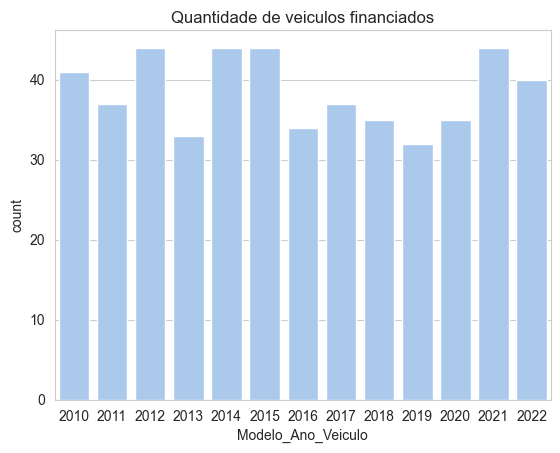

In [44]:
sns.barplot(x=tabela_veiculo['Modelo_Ano_Veiculo'], y=tabela_veiculo['count'])
plt.title('Quantidade de veiculos financiados')
plt.show()

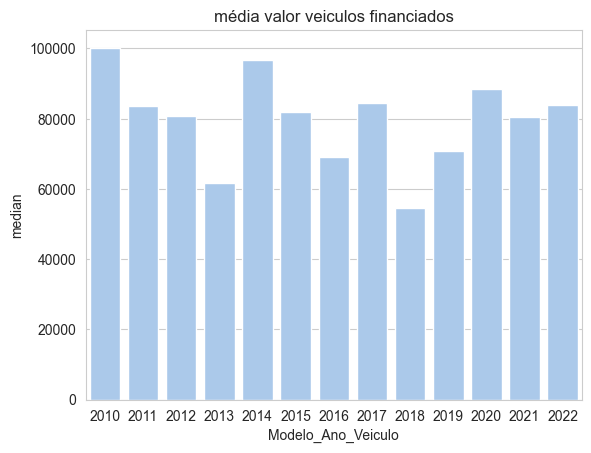

In [45]:
sns.barplot(x=tabela_veiculo['Modelo_Ano_Veiculo'], y=tabela_veiculo['median'])
plt.title('média valor veiculos financiados')
plt.show()


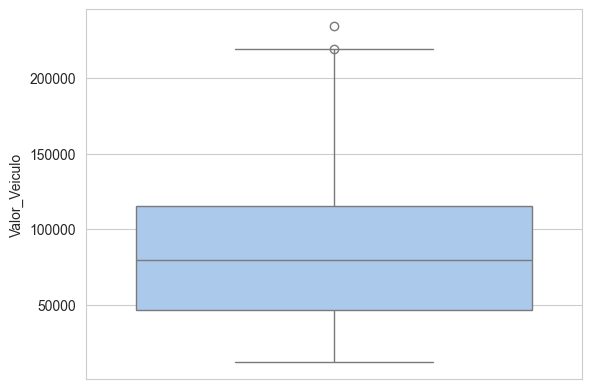

In [46]:
sns.boxplot(y='Valor_Veiculo', data=df)
plt.show()


In [47]:
stats = df['Valor_Veiculo'].describe()
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
total = int(stats['count'])  

count_below_q1 = (df['Valor_Veiculo'] < q1).sum()
count_q1_median = ((df['Valor_Veiculo'] >= q1) & (df['Valor_Veiculo'] < median)).sum()
count_median_q3 = ((df['Valor_Veiculo'] >= median) & (df['Valor_Veiculo'] < q3)).sum()
count_above_q3 = (df['Valor_Veiculo'] >= q3).sum()

pct_below_q1 = 100 * count_below_q1 / total
pct_q1_median = 100 * count_q1_median / total
pct_median_q3 = 100 * count_median_q3 / total
pct_above_q3 = 100 * count_above_q3 / total

print(stats[['min', '25%', '50%', '75%', 'max']])
print(f"\nTotal de registros: {total}")


min     11845.555556
25%     46155.244056
50%     79670.099291
75%    115524.948812
max    234517.500000
Name: Valor_Veiculo, dtype: float64

Total de registros: 500


In [48]:
df['Valor_Veiculo'].mean()


np.float64(84813.67394872398)

#### *conclusão*: Não tem uma corelação entre os veiculos de anos mais recentes serem mais financiados. No entanto, 2011, 2013 e entre 2016 e 2020 são anos com menos financiamentos que os demais.
Sobre os valores:

min     11.845   
25%     46.155   
50%     79.670        
75%    115.524       
max    234.517   

Média: 84.813

### Análise de Inadimplência

#### Qual é a taxa de inadimplência geral e como ela varia de acordo com a renda da  região e as características dos clientes?

##### Taxa de inadimplência geral

In [49]:
tabela_taxa_inadimplencia = df.groupby('Status_Pagamento')['Status_Pagamento'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia

,Status_Pagamento,count,porcentagem_status
0,Atrasado,102,0.204
1,Em dia,356,0.712
2,Inadimplente,42,0.084


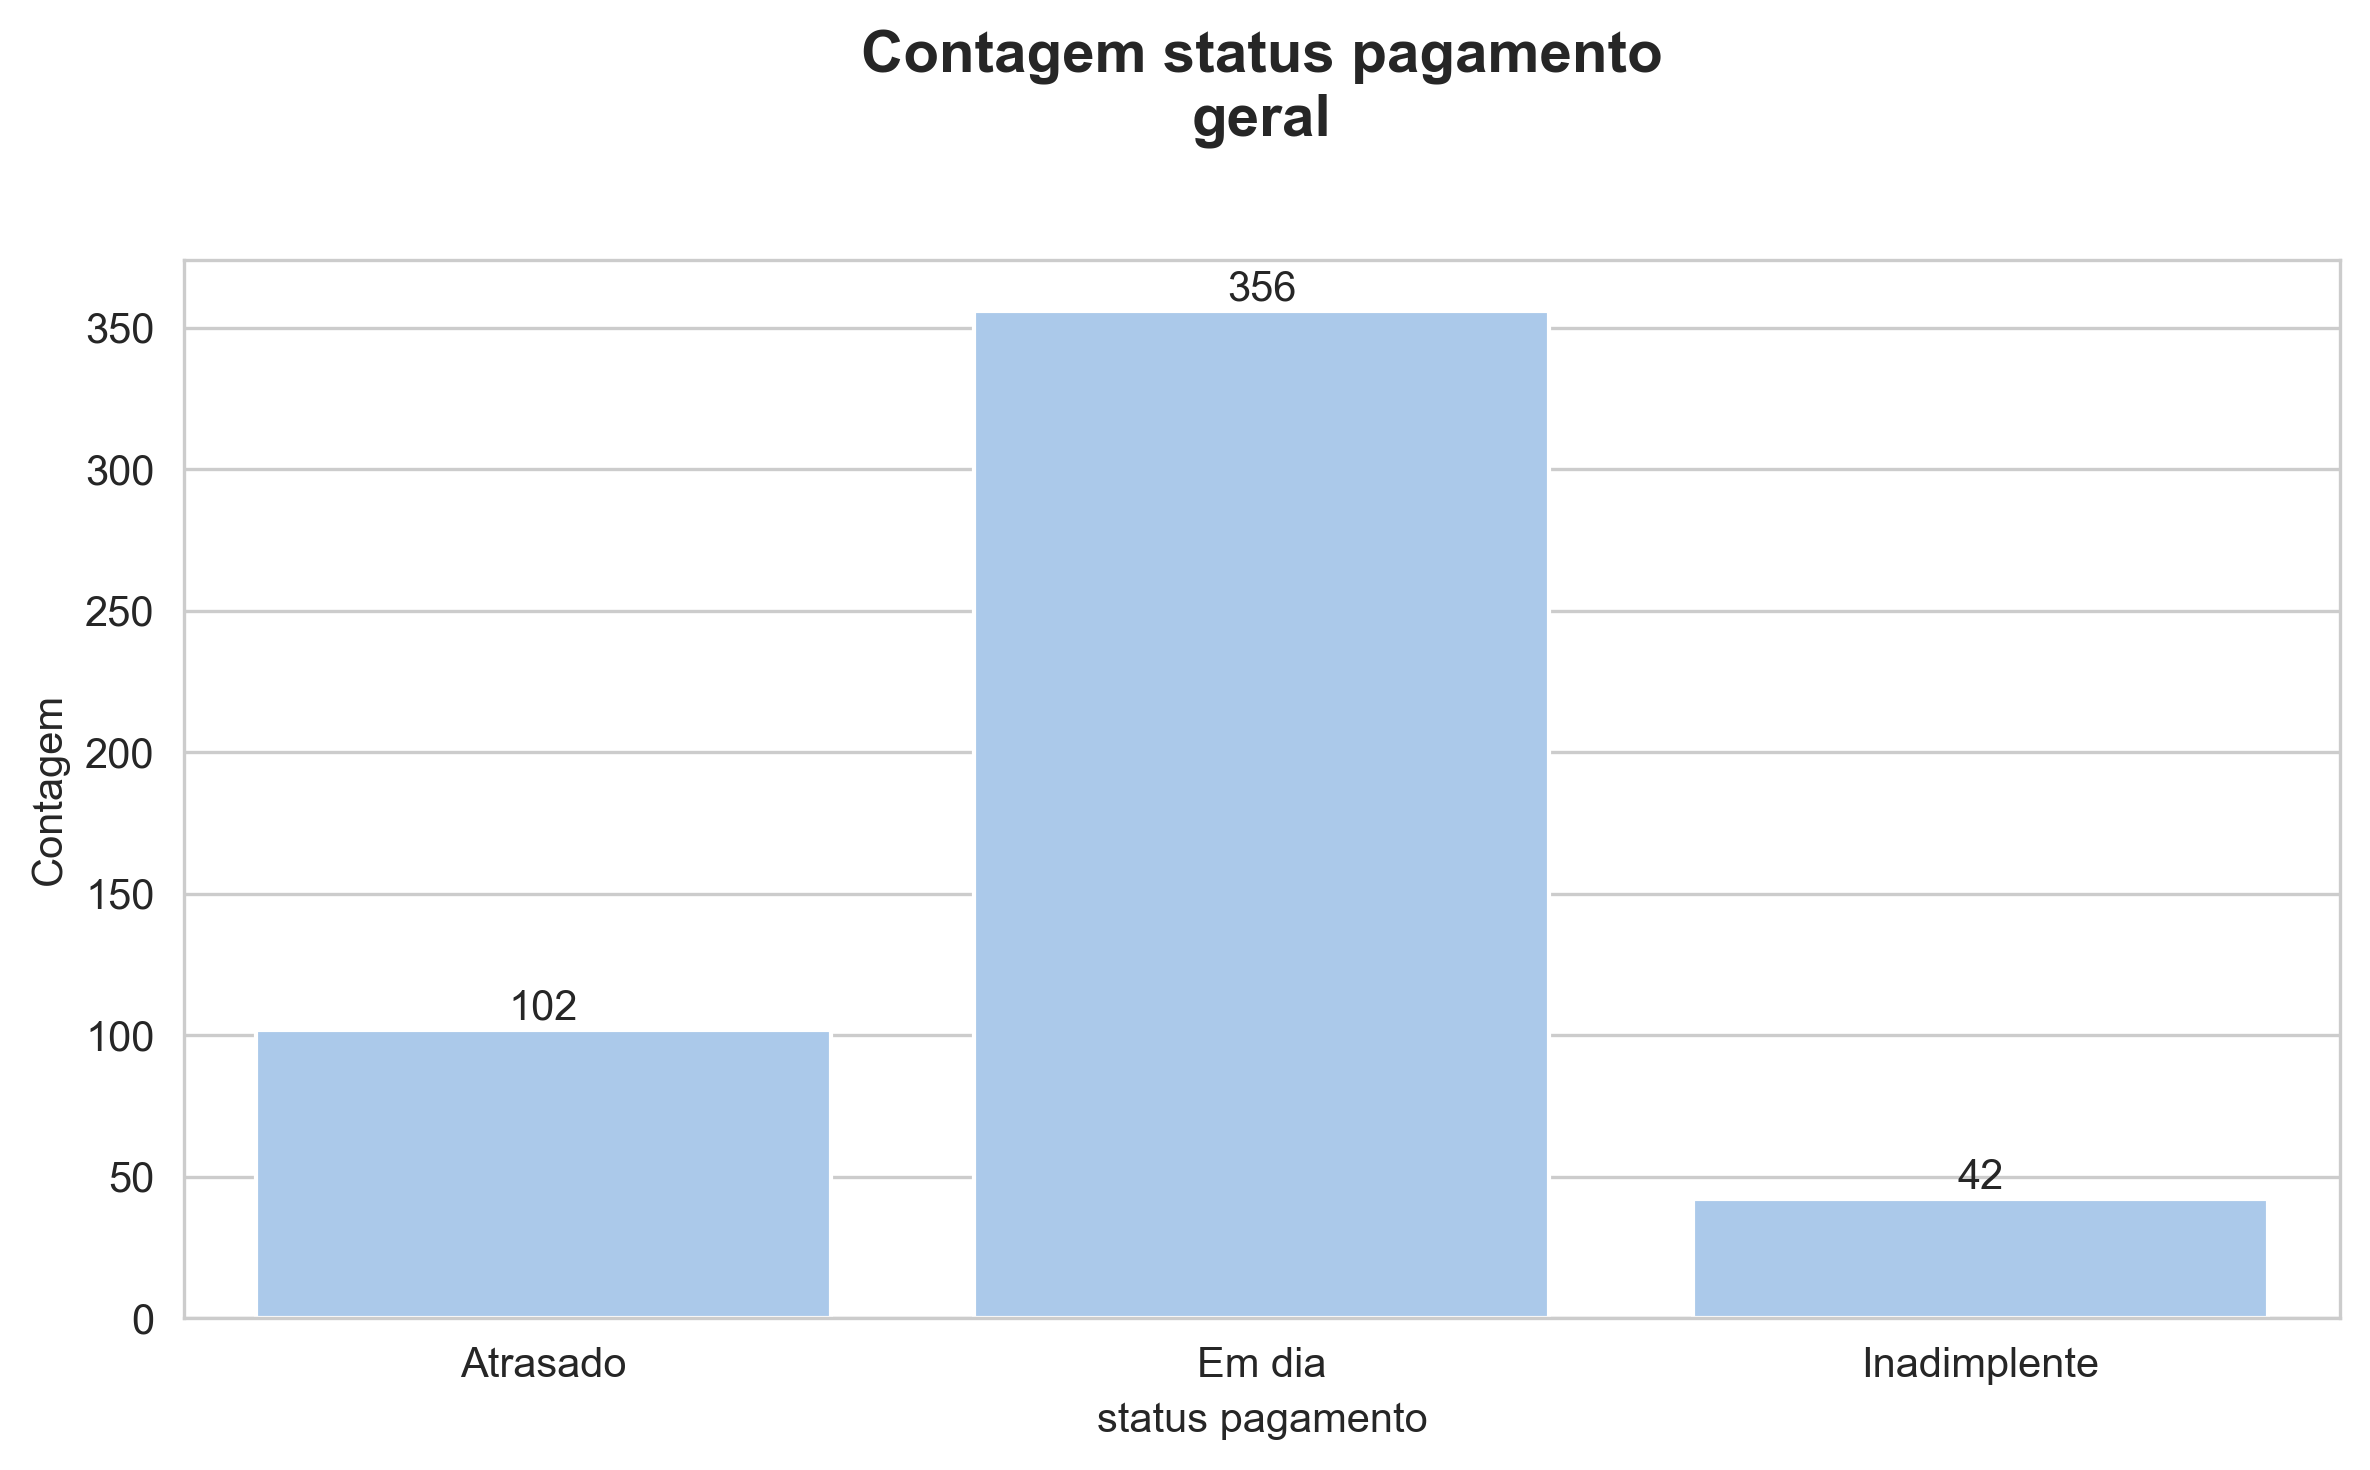

In [50]:

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_taxa_inadimplencia['Status_Pagamento'], y=tabela_taxa_inadimplencia['count'])
ax.set_title("Contagem status pagamento\ngeral", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("status pagamento")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


##### *conclusão Taxa de inadimplência geral*: 

	Status_Pagamento - count - porcentagem_status
	Atrasado: 102 - 20%
	Em dia:	356 - 71%
	Inadimplente:	42 - 8%

##### Taxa de inadimplência região

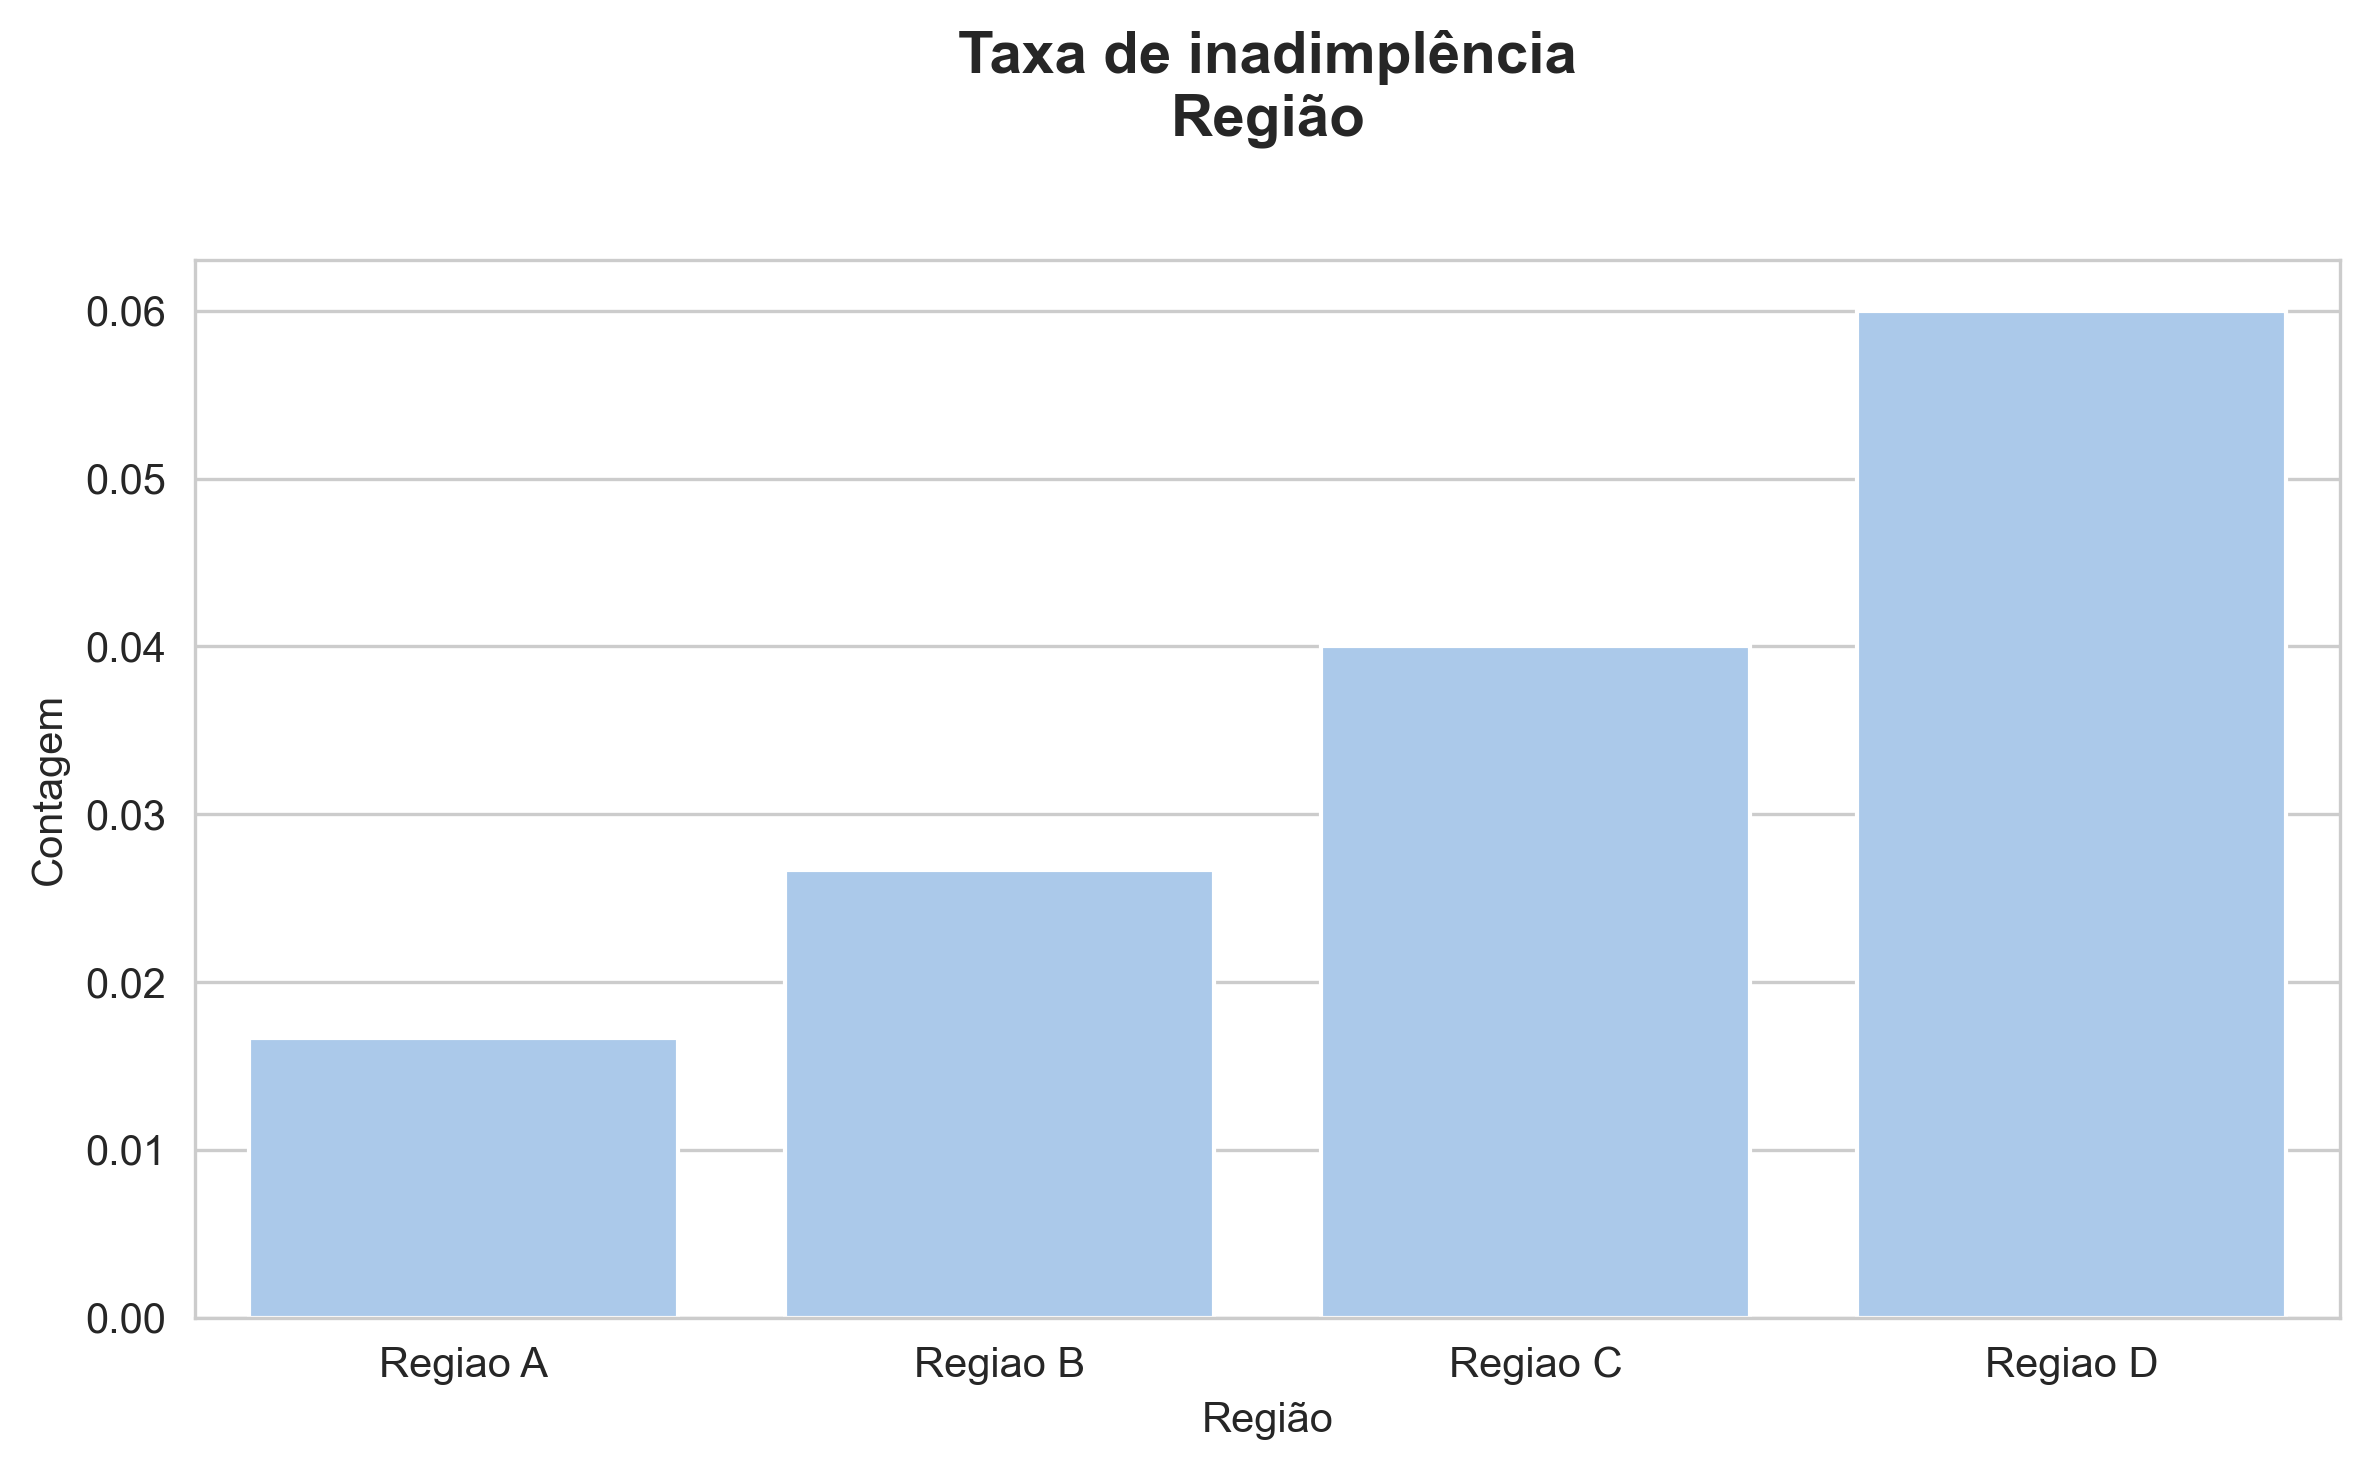

In [51]:
tabela_regiao = df.groupby('Regiao')['Taxa_Inadimplencia_Regional'].agg(['mean','median','std','min','max', 'count']).reset_index()

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_regiao['Regiao'], y=tabela_regiao['mean'])
ax.set_title("Taxa de inadimplência\nRegião", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Região")
ax.set_ylabel("Contagem")

plt.tight_layout()
plt.show()

##### *conclusão Taxa de inadimplência região*: 
	Regiao A:	0.016667    
	Regiao B:	0.026667    
	Regiao C:	0.040000    
	Regiao D:	0.060000    

##### Taxa de inadimplência Faixa_Idade

In [52]:
tabela_taxa_inadimplencia = df.groupby(['Faixa_Idade', 'Status_Pagamento'])['Status_Pagamento'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia_idade = tabela_taxa_inadimplencia.query('Status_Pagamento == "Inadimplente"')
tabela_taxa_inadimplencia_idade

,Faixa_Idade,Status_Pagamento,count,porcentagem_status
2,18-24,Inadimplente,1,0.002
5,25-34,Inadimplente,7,0.014
8,35-44,Inadimplente,11,0.022
11,45-54,Inadimplente,9,0.018
14,55-64,Inadimplente,9,0.018
17,65+,Inadimplente,5,0.010


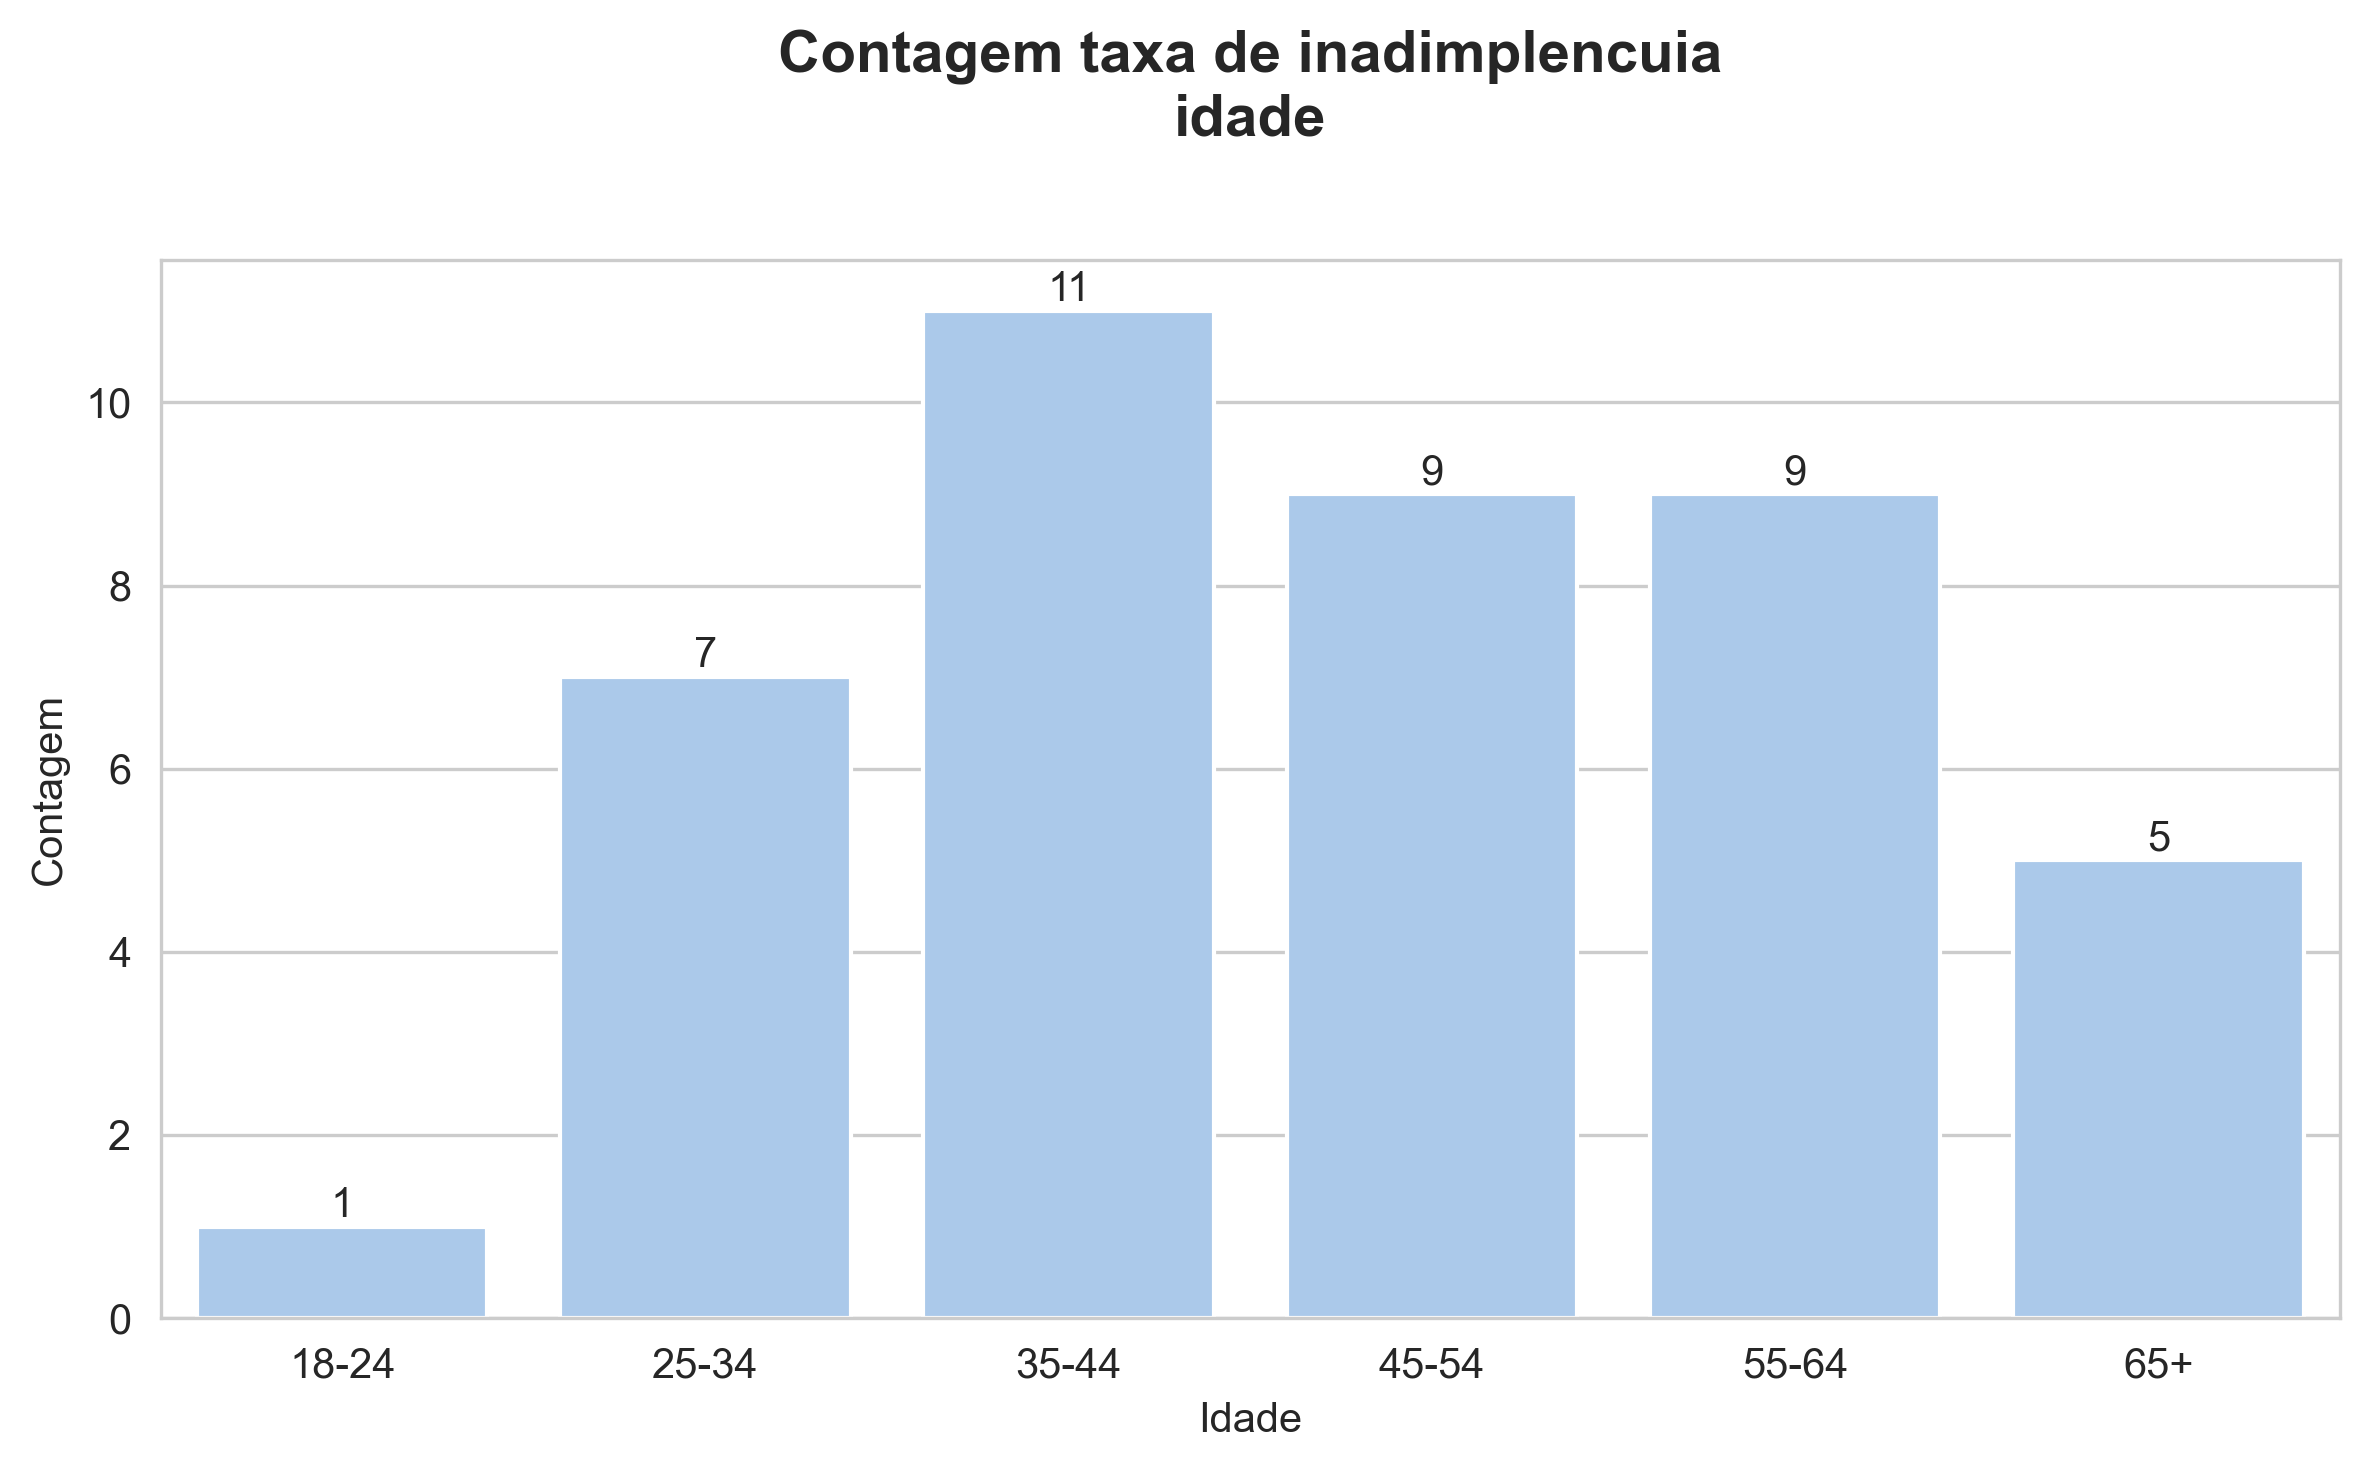

In [53]:

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_taxa_inadimplencia_idade['Faixa_Idade'], y=tabela_taxa_inadimplencia_idade['count'])
ax.set_title("Contagem taxa de inadimplencuia\nidade", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Idade")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

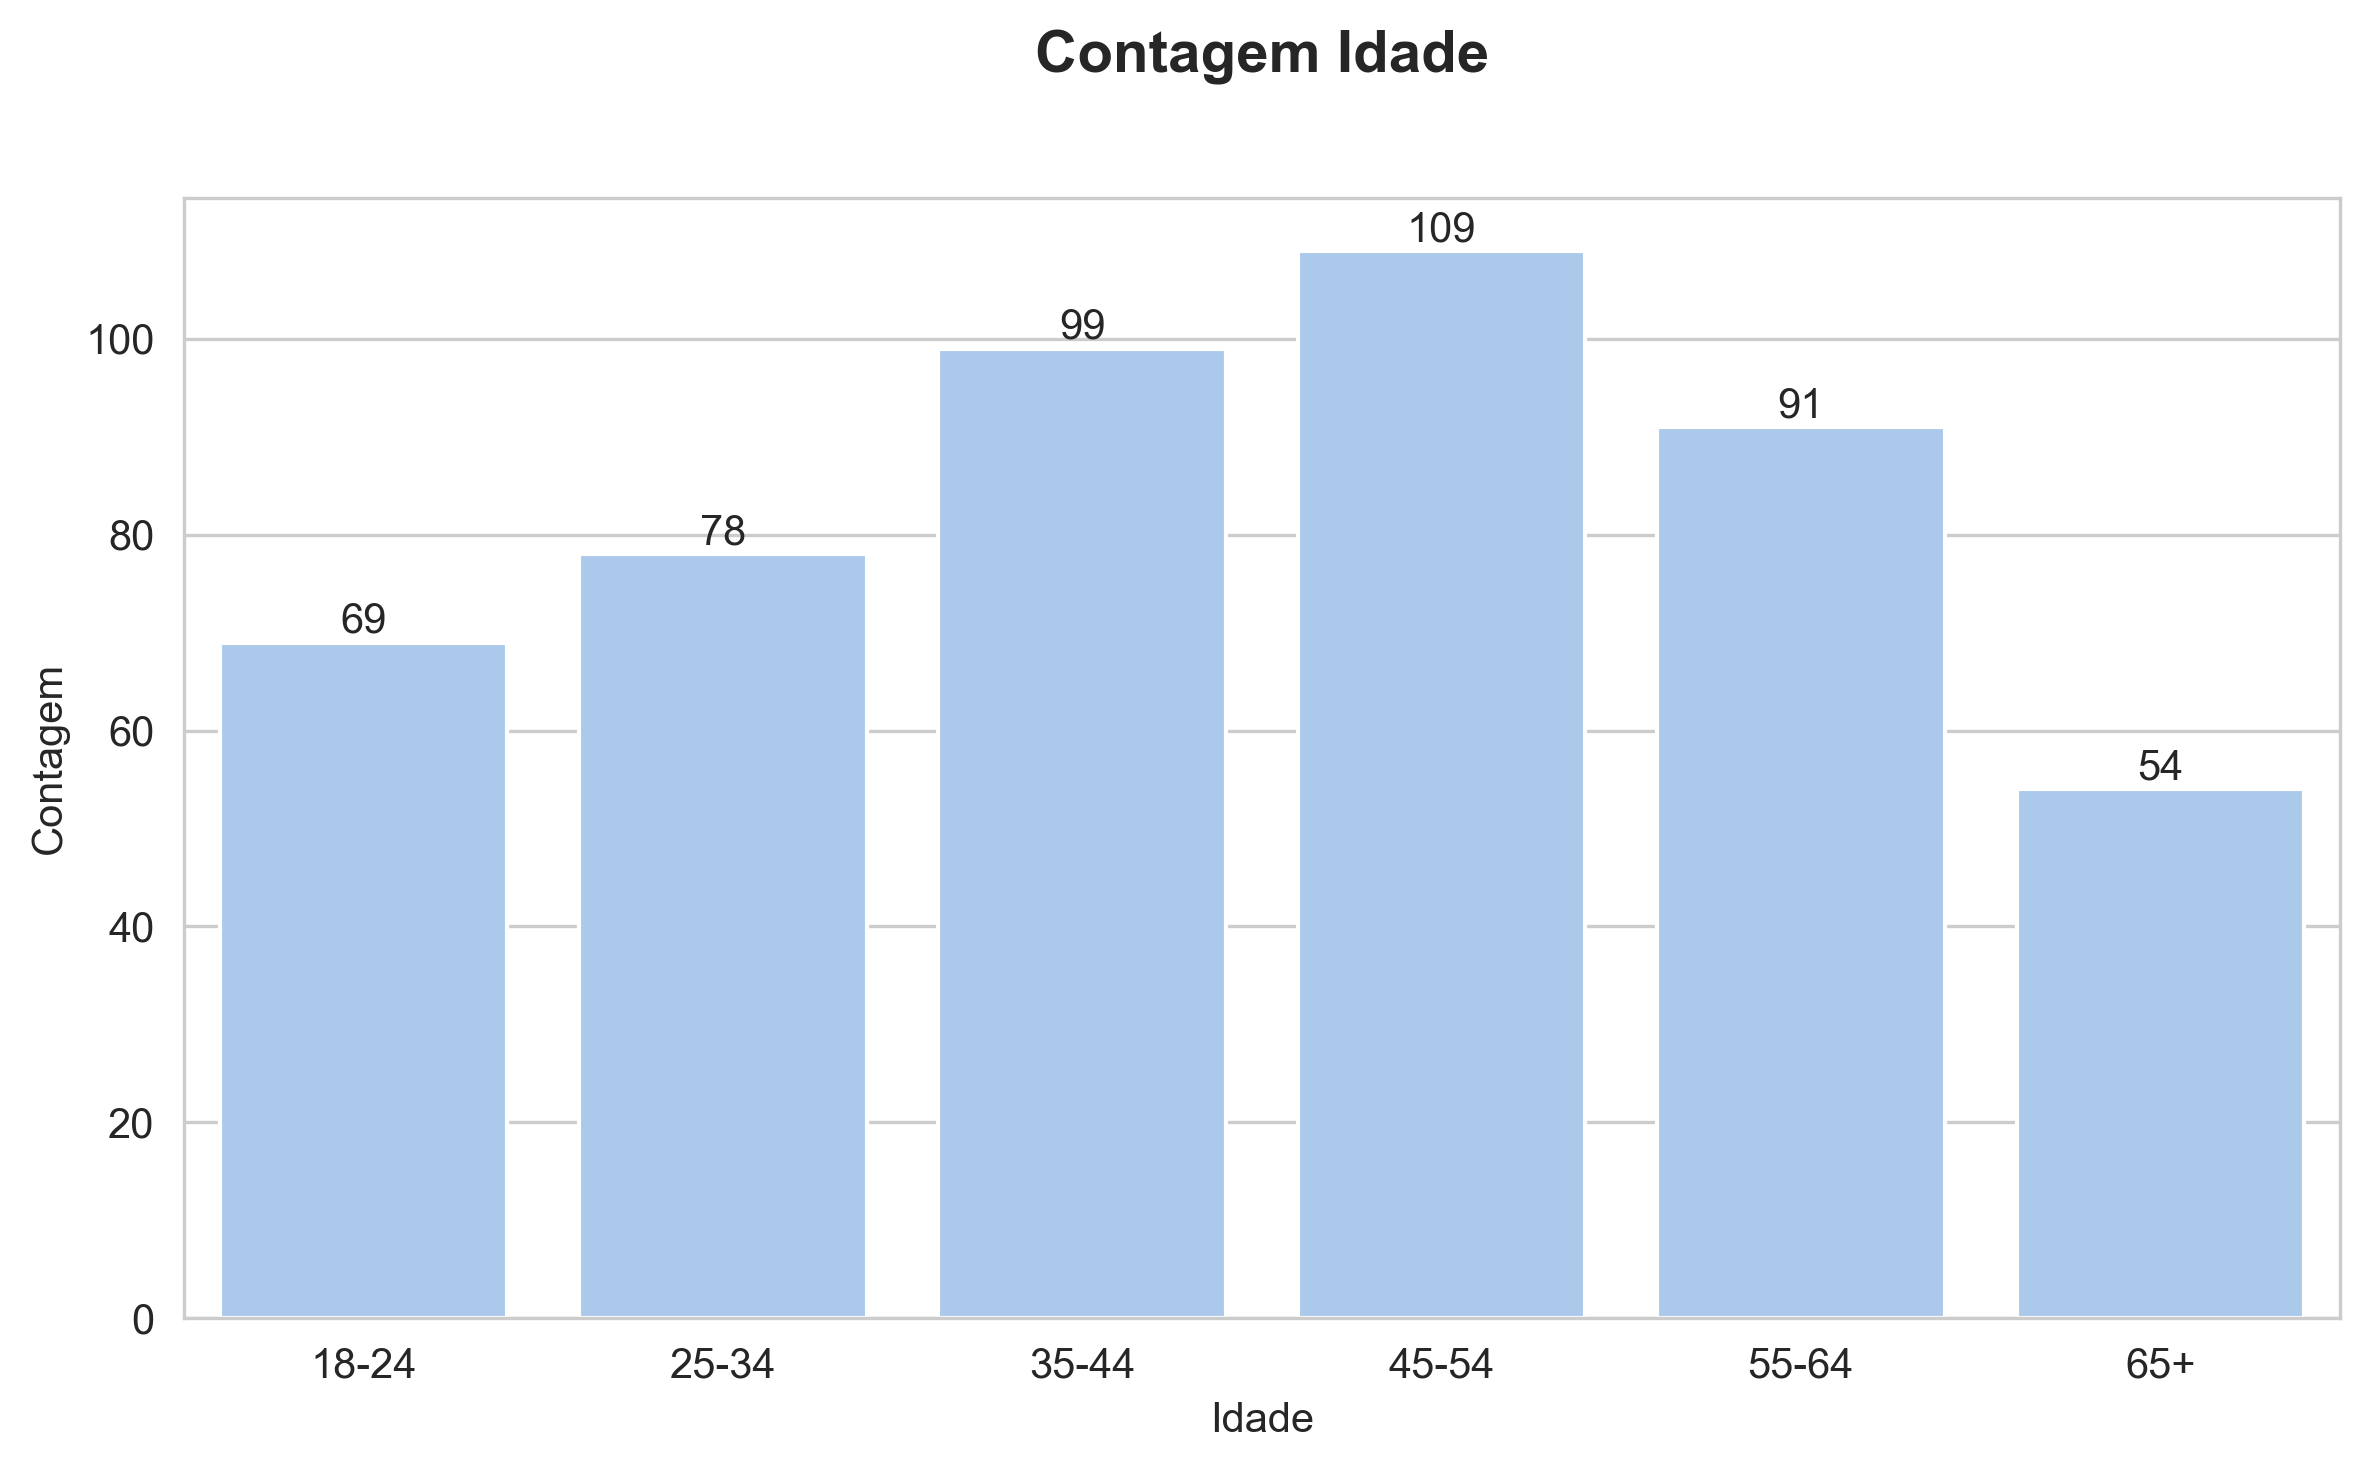

In [54]:
tabela_faixa_idade = df.groupby(['Faixa_Idade'])['Faixa_Idade'].agg(['count']).reset_index()

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x=tabela_faixa_idade['Faixa_Idade'], y=tabela_faixa_idade['count'])
ax.set_title("Contagem Idade", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Idade")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

##### *conclusão*: O que se destaca quando olhamos a inadimplente entre as idades, é que entre 18-24 a taxa é extremamente baixa e entre 35-44 é alta

##### Taxa de inadimplência Genero


In [55]:
tabela_taxa_inadimplencia = df.groupby(['Genero', 'Status_Pagamento'])['Status_Pagamento'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.query('Status_Pagamento == "Inadimplente"')
tabela_taxa_inadimplencia

,Genero,Status_Pagamento,count,porcentagem_status
2,Feminino,Inadimplente,21,0.042
5,Masculino,Inadimplente,21,0.042


##### *conclusão*: Sem diferenças relevantes 


##### Taxa de inadimplência Faixa_de_Renda

In [56]:
tabela_taxa_inadimplencia = df.groupby(['Faixa_de_Renda', 'Status_Pagamento'])['Status_Pagamento'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.query('Status_Pagamento == "Inadimplente"').sort_values(['count'])
tabela_taxa_inadimplencia

,Faixa_de_Renda,Status_Pagamento,count,porcentagem_status
2,Alta Renda,Inadimplente,12,0.024
8,Media Renda,Inadimplente,12,0.024
5,Baixa Renda,Inadimplente,18,0.036


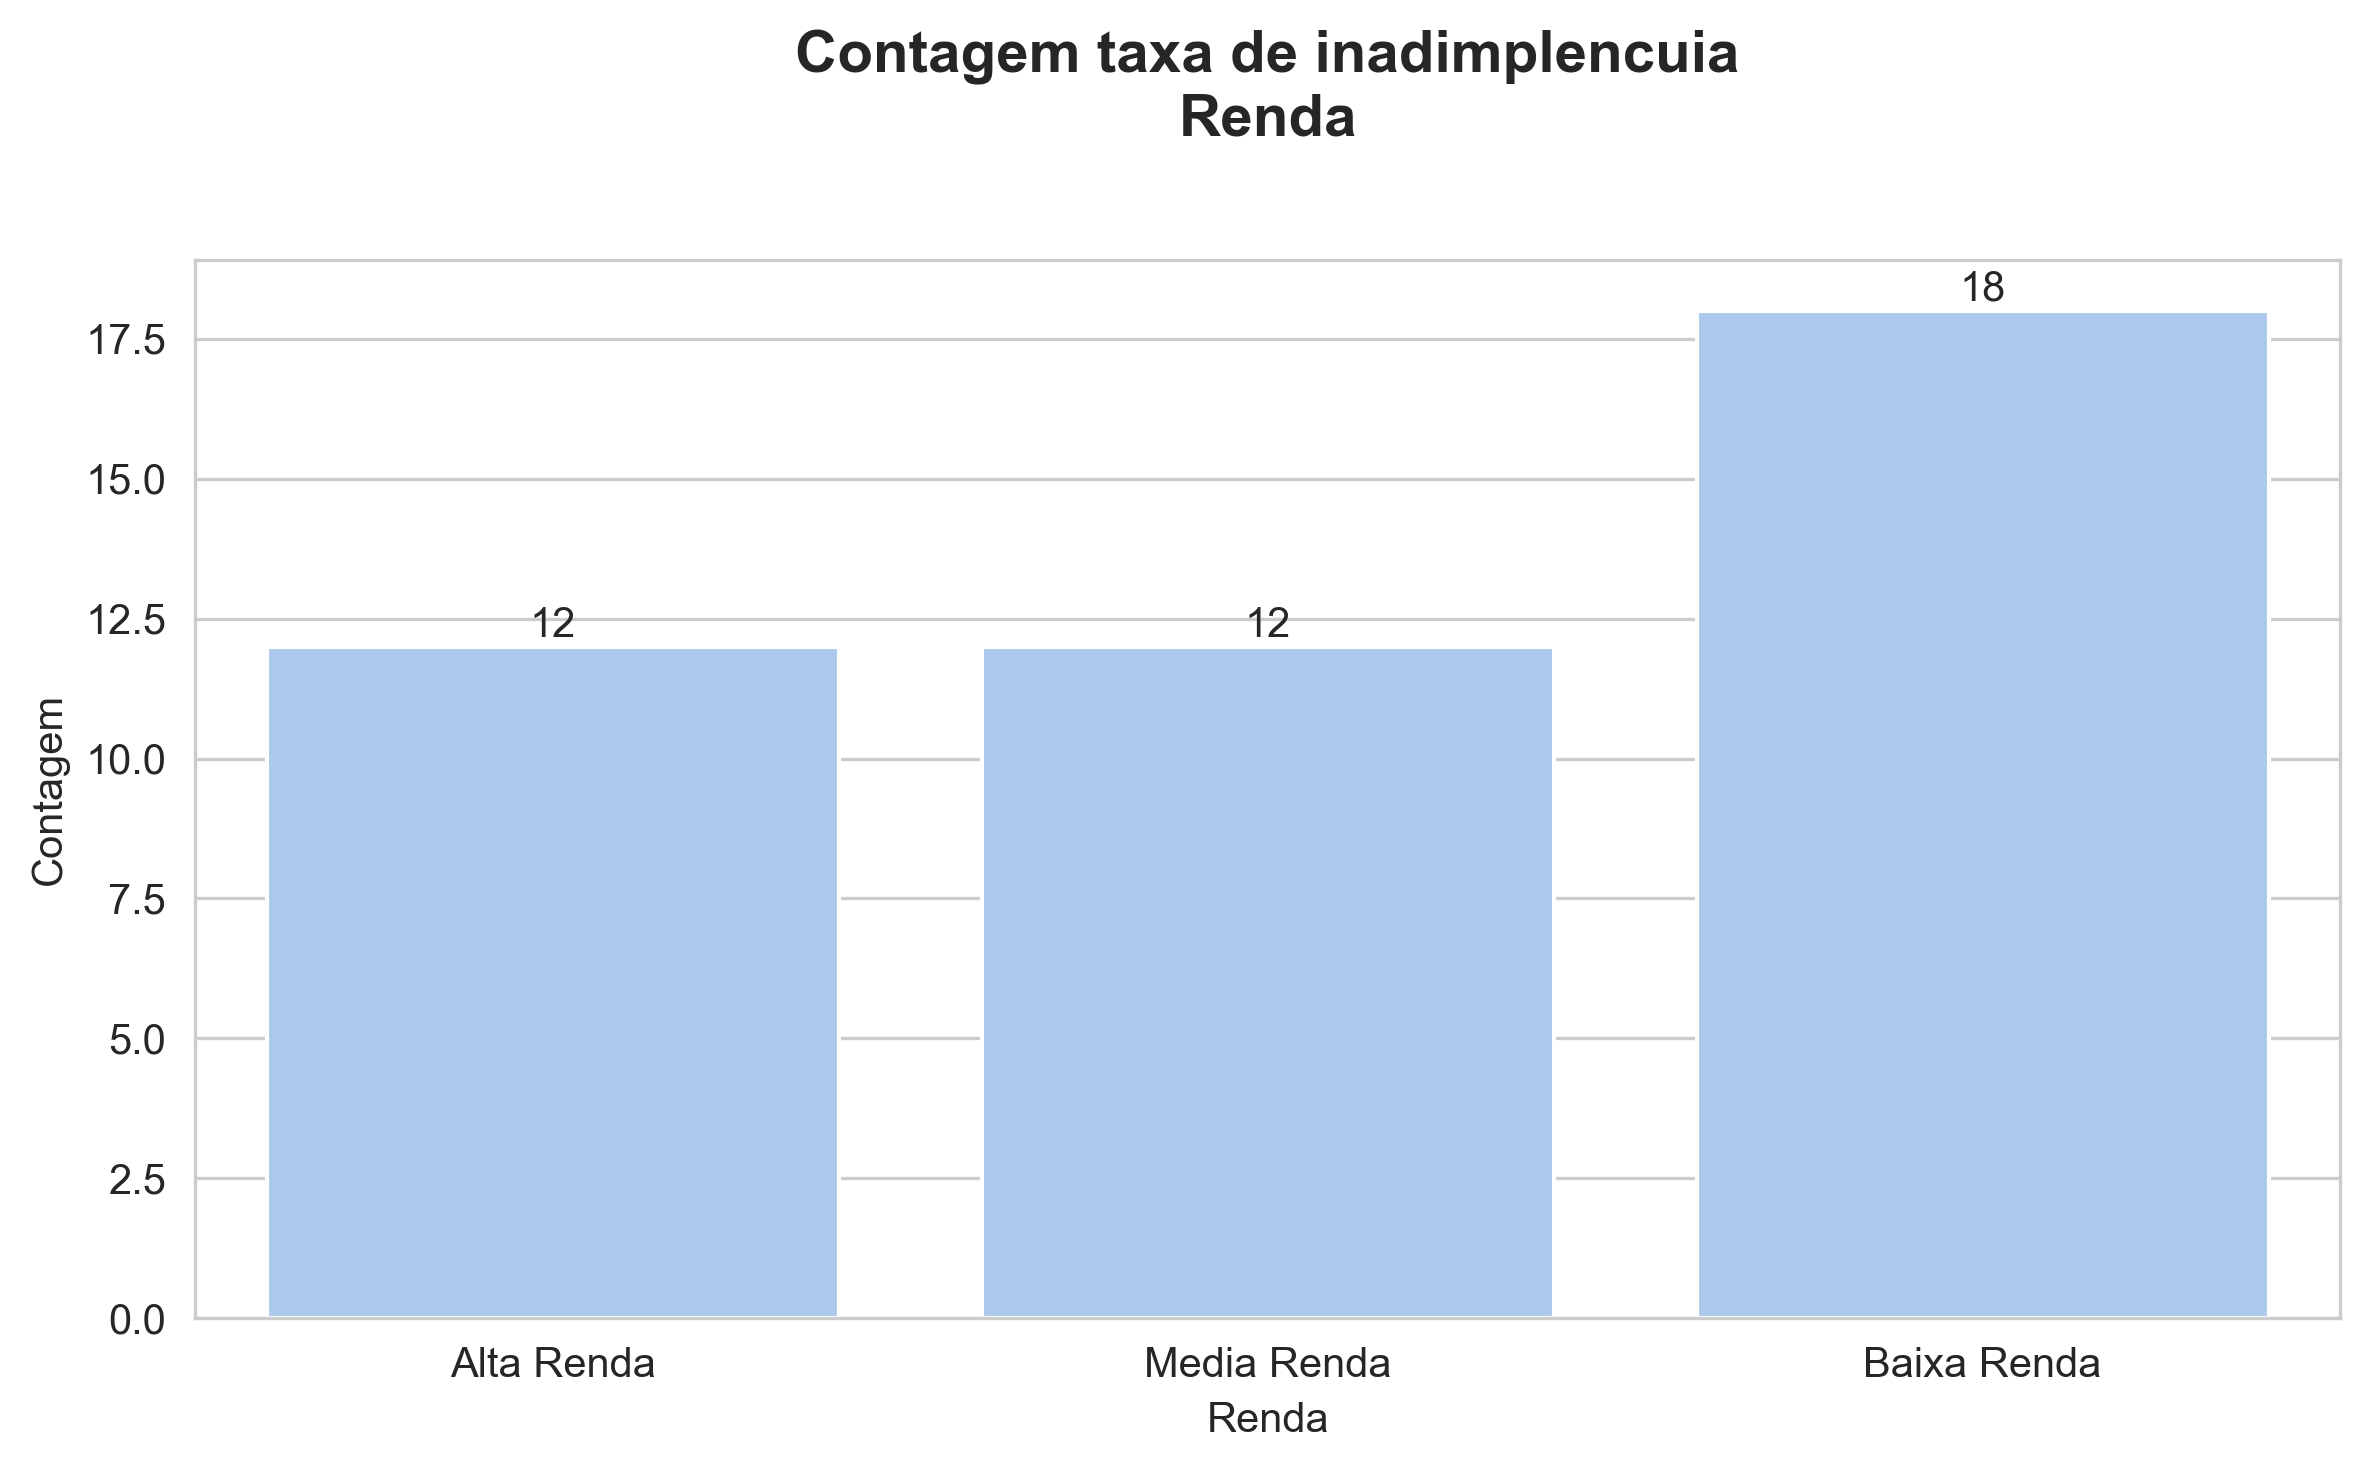

In [57]:

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x= tabela_taxa_inadimplencia['Faixa_de_Renda'], y=tabela_taxa_inadimplencia['count'])
ax.set_title("Contagem taxa de inadimplencuia\nRenda", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Renda")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

##### *Conclusão*: Baixa renda tem muito mais taxa de inadimplencia, enquanto média e alta renda estão iguais.

##### Taxa de inadimplência Valor_Financiado 

In [58]:
# 1) Calcule as quebras via quantis
limite1 = df['Valor_Financiado'].quantile(0.33)
limite2 = df['Valor_Financiado'].quantile(0.66)

def categorizar_valor_financiado(valor):
    if valor < limite1:
        return 'baixo financiamento'
    elif valor < limite2:
        return 'médio financiamento'
    else:
        return 'alto financiamento'

# 2) Crie a coluna categorizada
df['Faixa_Valor_Financiado'] = df['Valor_Financiado'].apply(categorizar_valor_financiado)

# 3) Verifique a distribuição
df.groupby('Faixa_Valor_Financiado')['Faixa_Valor_Financiado'].count()


Faixa_Valor_Financiado
alto financiamento     170
baixo financiamento    165
médio financiamento    165
Name: Faixa_Valor_Financiado, dtype: int64

In [59]:
tabela_taxa_inadimplencia = df.groupby(['Faixa_Valor_Financiado', 'Status_Pagamento'])['Status_Pagamento'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.query('Status_Pagamento == "Inadimplente"').sort_values(['count'])
tabela_taxa_inadimplencia

tabela_taxa_inadimplencia['Faixa_Valor_Financiado'] = pd.Categorical(
    tabela_taxa_inadimplencia['Faixa_Valor_Financiado'], 
    categories=['baixo financiamento', 'médio financiamento', 'alto financiamento'], 
    ordered=True
)

tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.sort_values('Faixa_Valor_Financiado')

tabela_taxa_inadimplencia

,Faixa_Valor_Financiado,Status_Pagamento,count,porcentagem_status
5,baixo financiamento,Inadimplente,10,0.020
8,médio financiamento,Inadimplente,17,0.034
2,alto financiamento,Inadimplente,15,0.030


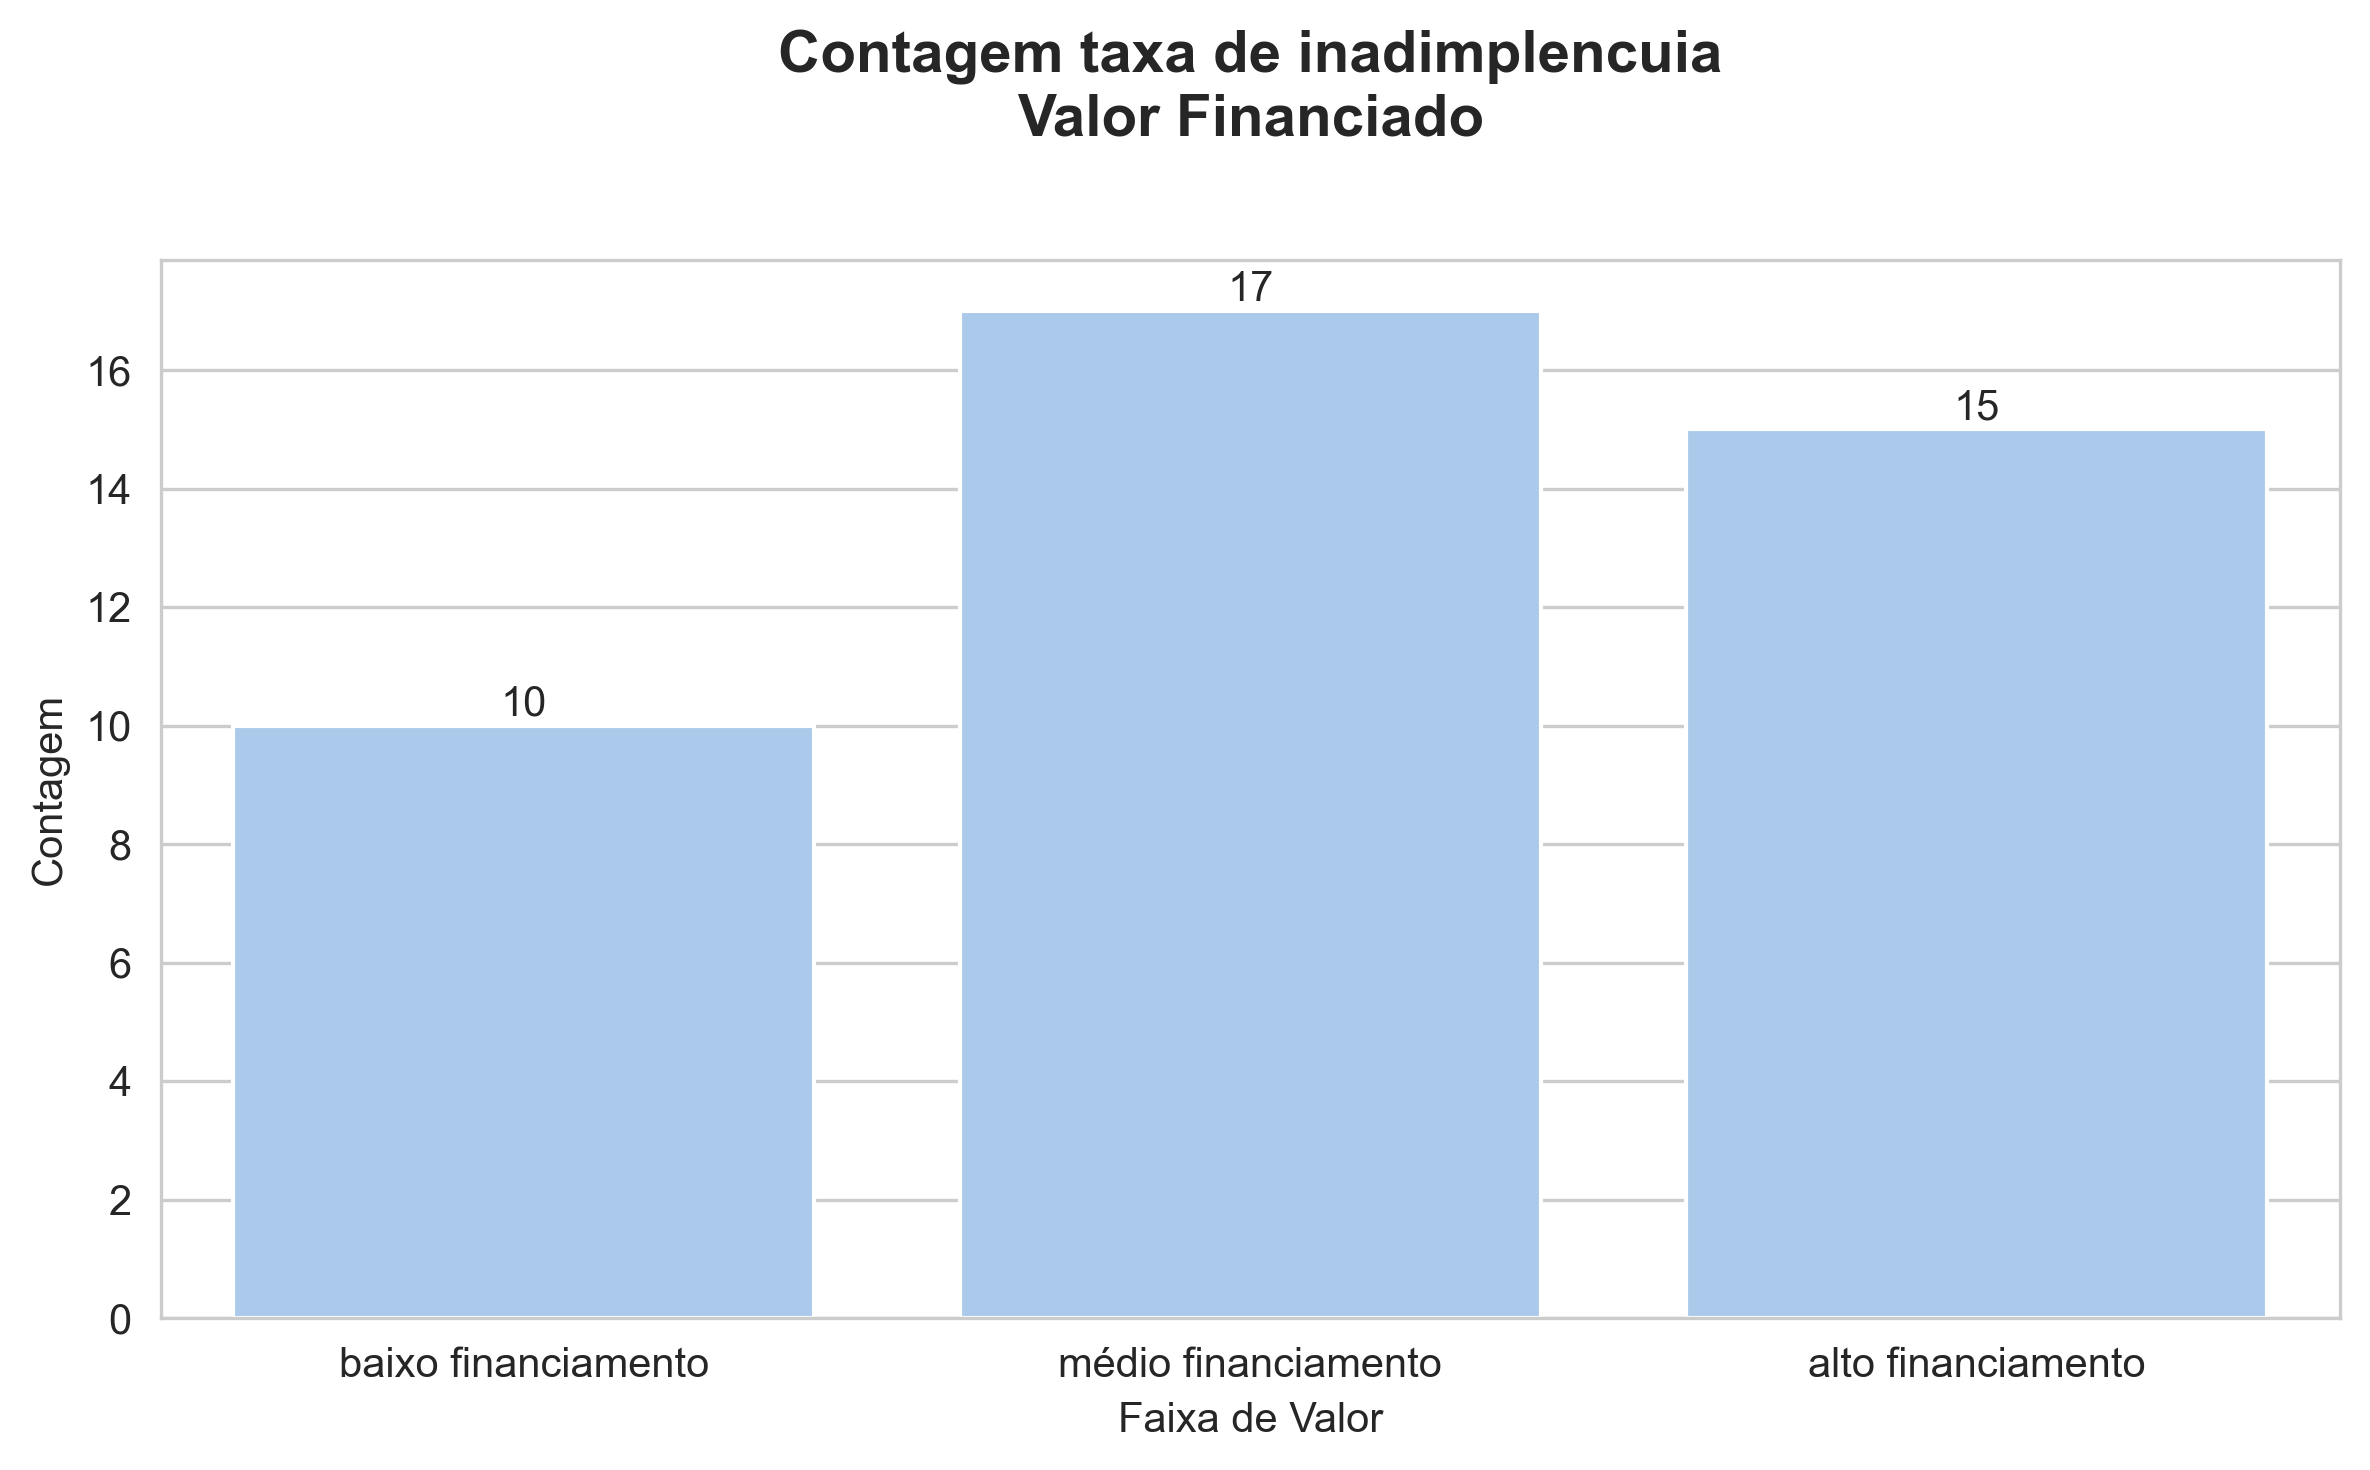

In [60]:


plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x = tabela_taxa_inadimplencia['Faixa_Valor_Financiado'], y = tabela_taxa_inadimplencia['count'])
ax.set_title("Contagem taxa de inadimplencuia\nValor Financiado", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Faixa de Valor")
ax.set_ylabel("Contagem")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

##### *Conclusão*: Taxa de Inadimplencia é menor em financiamentos de baixo porte. Médio porte e Alto porte são muito parecidos, mas o médio porte tem um pouco mais Inadimplencia que o alto porte.

##### Taxa de inadimplência Valor_Financiado x Faixa_de_Renda

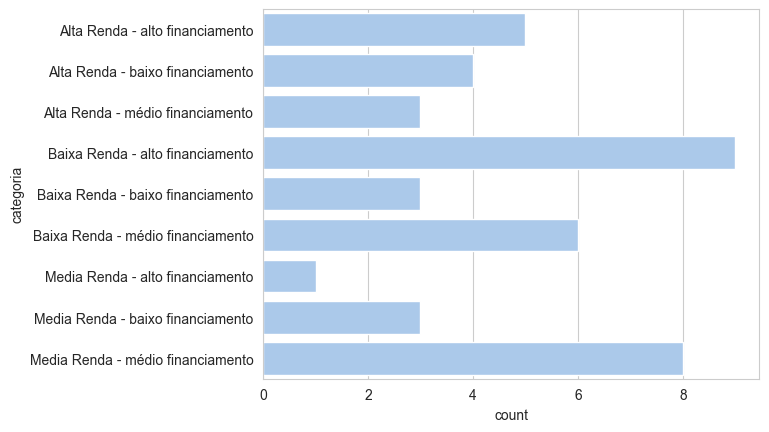

In [61]:
tabela_taxa_inadimplencia = df.groupby(['Faixa_de_Renda','Faixa_Valor_Financiado', 'Status_Pagamento'])['Status_Pagamento'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.query('Status_Pagamento == "Inadimplente"').sort_values(['count'])
tabela_taxa_inadimplencia['categoria'] =  tabela_taxa_inadimplencia['Faixa_de_Renda'].astype(str) + ' - ' + tabela_taxa_inadimplencia['Faixa_Valor_Financiado'].astype(str)
tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.sort_values('categoria')

sns.barplot(y=tabela_taxa_inadimplencia['categoria'], x=tabela_taxa_inadimplencia['count'])
plt.show()

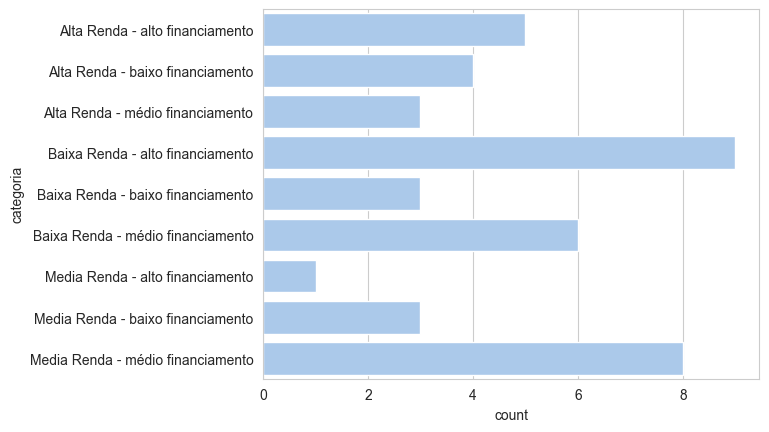

In [62]:
sns.barplot(y=tabela_taxa_inadimplencia['categoria'], x=tabela_taxa_inadimplencia['count'])
plt.show()

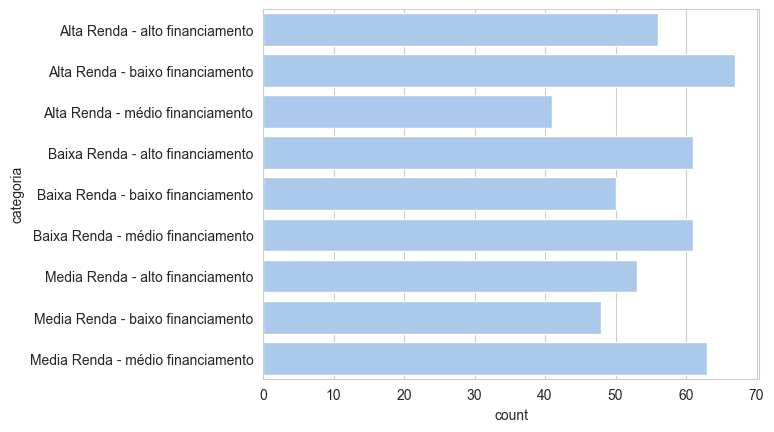

In [63]:
tabela_taxa_inadimplencia = df.groupby(['Faixa_de_Renda','Faixa_Valor_Financiado'])['Faixa_Valor_Financiado'].agg(['count']).reset_index()
tabela_taxa_inadimplencia['porcentagem_status'] = tabela_taxa_inadimplencia['count']/tabela_taxa_inadimplencia['count'].sum()
tabela_taxa_inadimplencia['categoria'] =  tabela_taxa_inadimplencia['Faixa_de_Renda'].astype(str) + ' - ' + tabela_taxa_inadimplencia['Faixa_Valor_Financiado'].astype(str)
tabela_taxa_inadimplencia = tabela_taxa_inadimplencia.sort_values('categoria')
sns.barplot(y=tabela_taxa_inadimplencia['categoria'], x=tabela_taxa_inadimplencia['count'])
plt.show()

##### *conclusão*:
Alta Renda - alto financiamento: taxa de inadimplencia normal   
Alta Renda - baixo financiamento: taxa de inadimplencia baixa   
Alta Renda - médio financiamento: taxa de inadimplencia baixa   

Baixa Renda - alto financiamento: taxa de inadimplencia alta+   
Baixa Renda - baixo financiamento: taxa de inadimplencia baixa  
Baixa Renda - médio financiamento: taxa de inadimplencia alta

Media Renda - alto financiamento: taxa de inadimplencia baixa+  
Media Renda - baixo financiamento: taxa de inadimplencia baixa  
Media Renda - médio financiamento: taxa de inadimplencia alta+

com exceção da média renda, financiamentos categorizados como mais altos que a categoria de renda da pessoa tende a causar mais inadimplência.

#### Quais variáveis (Idade, Faixa_de_Renda, Modelo_Ano_Veiculo, Valor_Financiado) parecem estar mais associadas à inadimplência? 

In [64]:
mapa_renda = {'Baixa Renda': 1, 'Media Renda': 2, 'Alta Renda': 3}
mapa_status = {'Em dia': 0, 'Inadimplente': 1, 'Atrasado': 0}


tabela_correlacao = df[['Idade', 'Faixa_de_Renda', 'Modelo_Ano_Veiculo', 'Valor_Financiado', 'Status_Pagamento']]
tabela_correlacao['Faixa_de_Renda'] = tabela_correlacao['Faixa_de_Renda'].map(mapa_renda)
tabela_correlacao['Status_Pagamento'] = tabela_correlacao['Status_Pagamento'].map(mapa_status)

tabela_correlacao['Status_Pagamento'].value_counts()

C:\Users\felip\AppData\Local\Temp\ipykernel_18212\2850339057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_correlacao['Faixa_de_Renda'] = tabela_correlacao['Faixa_de_Renda'].map(mapa_renda)
C:\Users\felip\AppData\Local\Temp\ipykernel_18212\2850339057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_correlacao['Status_Pagamento'] = tabela_correlacao['Status_Pagamento'].map(mapa_status)


Status_Pagamento
0    458
1     42
Name: count, dtype: int64

In [65]:
# Criar a matriz de correlação de todas as colunas numéricas
corr_matrix = tabela_correlacao.corr(method='pearson')
corr_com_status = corr_matrix['Status_Pagamento'].sort_values(ascending=False).reset_index()
corr_com_status

,index,Status_Pagamento
0,Status_Pagamento,1.000000
1,Idade,0.061325
2,Modelo_Ano_Veiculo,0.049340
3,Valor_Financiado,0.035552
4,Faixa_de_Renda,-0.046871


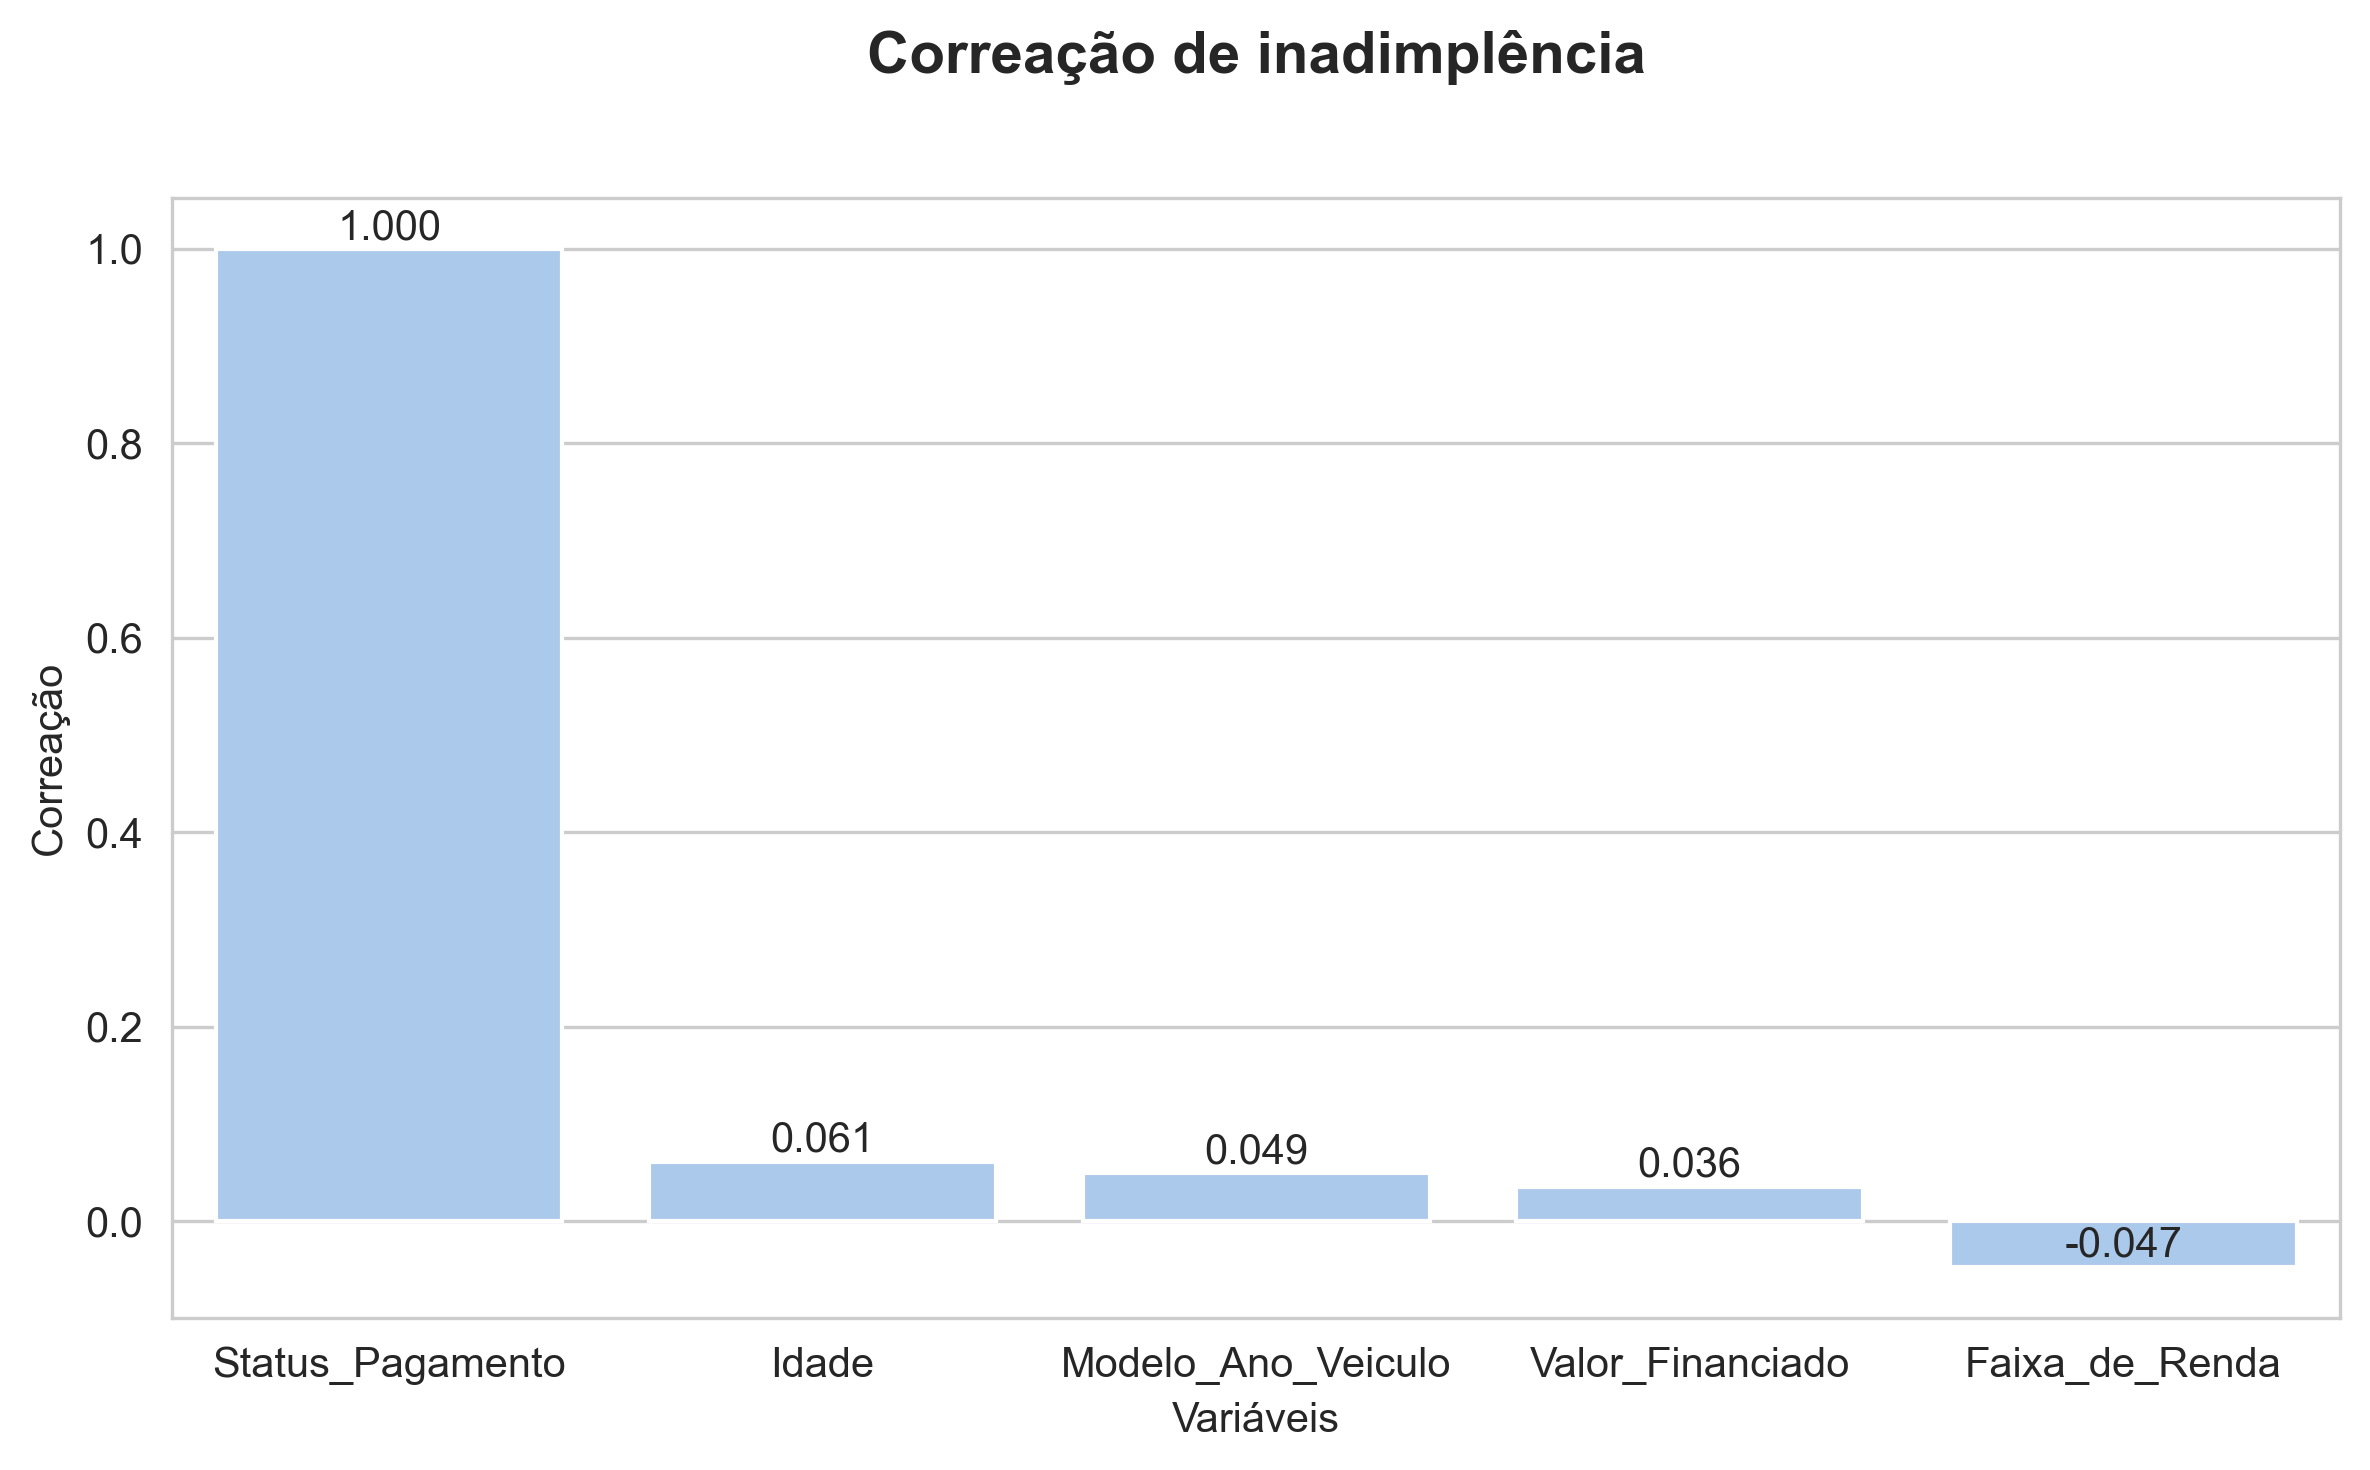

In [66]:

plt.figure(figsize=(8, 5), dpi=300)
ax = sns.barplot(x = corr_com_status['index'], y = corr_com_status['Status_Pagamento'])
ax.set_title("Correação de inadimplência", fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel("Variáveis")
ax.set_ylabel("Correação")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.3f'),                  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 5),         
        textcoords='offset points'
    )

plt.tight_layout()

#### *conclusão*: Apliquei correlação linear, mas nenhuma variável apresenta forte correlação com inadimplência. No entanto, é possível observar que temos um leve indicio de que quanto maior a idade mais chance tem de inadimplência. P mesmo do modelo do veiculo, quanto mais recente, maior a chance de inadimplência. Já quanto menor a faixa de renda, maior é a taxa de inadimplência. Se eu tiver que apontar o que mais tem correlação, seria a idade. Mas ainda sim, por esse dados, é uma baixa correlação que pode inclusive estar associada a outros fatores. 

#### Isso não invalida toda análise, podem ter outros fatores que influenciam ou outros tipos de correlação. Visto isso, acredito que um modelo de árvore de decisão seria mais eficiente.